In [7]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [13]:
# 使えず
label = pd.read_csv("../Cyclum/old-version/data/mESC/mesc-tpm-label.txt", sep="\t")
label

,Unnamed: 0,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,stage,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,...,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m


In [8]:
tpm= pd.read_pickle("../Cyclum/data/McDavid/h9_df.pkl")
tpm

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
ABCF1,6.003354,12.387758,11.514999,8.688718,6.793900,9.013069,6.748097,4.253332,7.480401,13.279730,...,3.274192,8.807125,11.109395,11.818605,3.793900,8.575260,11.277716,11.466326,8.088521,7.133750
ALAS1,2.558950,11.104558,10.048129,8.465841,2.558950,4.674428,3.973988,3.558950,3.973988,9.816338,...,3.780486,7.616286,7.195710,4.973131,3.973988,8.240774,9.158863,9.240774,8.632199,4.143913
ANLN,5.967119,9.560074,9.026013,8.689585,6.867583,5.967119,8.126318,5.230153,9.417780,11.048913,...,7.500023,7.197460,9.750001,9.460495,7.417780,8.614817,8.841588,10.131691,9.082596,4.060228
ARL6IP1,8.248387,13.513772,12.978849,9.150776,9.304581,11.875426,7.091882,3.314275,3.314275,14.138552,...,4.065851,10.719703,12.884781,12.483636,2.828848,9.796939,12.781589,12.362178,12.479541,11.461843
ATF2,3.623748,8.852567,9.642412,2.623748,3.038786,2.038786,2.623748,3.846141,3.038786,10.657171,...,2.917787,2.502749,3.239715,7.666389,1.038786,3.360714,8.675411,8.072209,2.623748,2.623748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS25,3.797443,8.680086,7.713920,6.230402,5.175955,7.815365,6.282870,3.934946,7.203435,9.093900,...,5.741284,6.408708,7.698215,7.187800,5.723442,7.655424,7.732903,8.541604,5.901780,4.060477
WDR76,8.717487,12.085756,12.457066,10.361044,3.446958,10.696782,9.859739,3.709992,10.007673,10.909665,...,6.764528,10.476809,10.285848,9.922957,8.989216,8.353849,10.403479,10.166689,3.125030,3.932385
ZC3HC1,6.456581,8.783843,9.565880,8.602561,6.949621,8.602561,9.836120,5.746088,8.483053,9.743353,...,8.228060,6.132136,8.019661,8.244836,6.584337,6.891518,9.698873,9.635384,5.987096,3.509049
ZNF367,1.220361,9.344483,9.034142,3.220361,3.805324,1.220361,1.220361,3.805324,2.220361,7.410186,...,2.703337,6.660319,6.739754,8.486988,2.805324,7.307824,7.612679,6.679793,2.805324,1.220361


In [9]:
cycle= pd.read_pickle("../Cyclum/data/McDavid/h9_cpt.pkl").T
cycle.index = ["phase"]
cycle

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
phase,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,s,s,s,...,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m


In [6]:
cycle.to_csv("h9_phase.tsv", sep="\t")

In [110]:
list(set(cycle["cycle"]))

['g2/m', 'g0/g1', 's']

In [11]:
cell_few_genes = []
for column in tpm.columns:
    if len(tpm[column].value_counts()) < 100:
        cell_few_genes.append(column)
        
cell_few_genes

[]

In [10]:
tpm_t = tpm.T
tpm_t

,ABCF1,ALAS1,ANLN,ARL6IP1,ATF2,BCL6,BIRC5,BMP1,BTBD3,BUB1,...,UBE2C,UNG,USP1,VANGL1,VCAM1,VPS25,WDR76,ZC3HC1,ZNF367,ZRANB2
10 H91A,6.003354,2.558950,5.967119,8.248387,3.623748,2.830614,9.705995,8.504304,10.360493,2.685282,...,1.749148,10.777584,9.533740,7.785388,6.664048,3.797443,8.717487,6.456581,1.220361,10.453728
10 H91B,12.387758,11.104558,9.560074,13.513772,8.852567,11.467238,10.931655,11.132738,6.820973,6.814565,...,7.607129,14.615047,15.203359,9.550137,9.508770,8.680086,12.085756,8.783843,9.344483,11.795798
10 H91C,11.514999,10.048129,9.026013,12.978849,9.642412,8.445324,11.586696,11.660979,4.854140,5.492637,...,8.878431,15.017244,14.528450,9.910084,9.263658,7.713920,12.457066,9.565880,9.034142,11.695617
10 H91D,8.688718,8.465841,8.689585,9.150776,2.623748,3.415576,11.505696,7.955411,8.972137,3.007210,...,0.749148,12.523589,13.292953,8.343383,7.882229,6.230402,10.361044,8.602561,3.220361,11.325518
10 H91E,6.793900,2.558950,6.867583,9.304581,3.038786,5.290045,10.382157,2.200523,9.052920,3.007210,...,6.656039,9.150801,12.361376,10.327417,9.015123,5.175955,3.446958,6.949621,3.805324,10.074235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9 H96B,8.575260,8.240774,8.614817,9.796939,3.360714,4.152542,10.338509,3.785486,6.348905,4.270245,...,10.322795,10.459087,13.253051,9.494025,9.183765,7.655424,8.353849,6.891518,7.307824,9.563911
9 H96C,11.277716,9.158863,8.841588,12.781589,8.675411,3.415576,9.857998,10.688363,8.038565,4.007210,...,5.208580,11.410295,13.504195,10.667125,9.777259,7.732903,10.403479,9.698873,7.612679,11.626196
9 H96D,11.466326,9.240774,10.131691,12.362178,8.072209,8.369773,11.992376,11.280008,6.252689,6.492637,...,10.504036,12.301743,14.178635,10.550137,9.827416,8.541604,10.166689,9.635384,6.679793,11.385055
9 H96E,8.088521,8.632199,9.082596,12.479541,2.623748,9.361995,9.627568,3.785486,2.394708,5.385722,...,7.656039,4.326373,11.365033,2.615463,2.049339,5.901780,3.125030,5.987096,2.805324,3.669093


In [12]:
# 細胞数でフィルタリング

gene_few_cells = []
for gene in tpm_t.columns:
    if len(tpm_t[gene].value_counts()) < 5:
        gene_few_cells.append(gene)

gene_few_cells

[]

In [13]:
tpm_cell_filtered = tpm.drop(cell_few_genes, axis=1)
tpm_cell_filtered

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
ABCF1,6.003354,12.387758,11.514999,8.688718,6.793900,9.013069,6.748097,4.253332,7.480401,13.279730,...,3.274192,8.807125,11.109395,11.818605,3.793900,8.575260,11.277716,11.466326,8.088521,7.133750
ALAS1,2.558950,11.104558,10.048129,8.465841,2.558950,4.674428,3.973988,3.558950,3.973988,9.816338,...,3.780486,7.616286,7.195710,4.973131,3.973988,8.240774,9.158863,9.240774,8.632199,4.143913
ANLN,5.967119,9.560074,9.026013,8.689585,6.867583,5.967119,8.126318,5.230153,9.417780,11.048913,...,7.500023,7.197460,9.750001,9.460495,7.417780,8.614817,8.841588,10.131691,9.082596,4.060228
ARL6IP1,8.248387,13.513772,12.978849,9.150776,9.304581,11.875426,7.091882,3.314275,3.314275,14.138552,...,4.065851,10.719703,12.884781,12.483636,2.828848,9.796939,12.781589,12.362178,12.479541,11.461843
ATF2,3.623748,8.852567,9.642412,2.623748,3.038786,2.038786,2.623748,3.846141,3.038786,10.657171,...,2.917787,2.502749,3.239715,7.666389,1.038786,3.360714,8.675411,8.072209,2.623748,2.623748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS25,3.797443,8.680086,7.713920,6.230402,5.175955,7.815365,6.282870,3.934946,7.203435,9.093900,...,5.741284,6.408708,7.698215,7.187800,5.723442,7.655424,7.732903,8.541604,5.901780,4.060477
WDR76,8.717487,12.085756,12.457066,10.361044,3.446958,10.696782,9.859739,3.709992,10.007673,10.909665,...,6.764528,10.476809,10.285848,9.922957,8.989216,8.353849,10.403479,10.166689,3.125030,3.932385
ZC3HC1,6.456581,8.783843,9.565880,8.602561,6.949621,8.602561,9.836120,5.746088,8.483053,9.743353,...,8.228060,6.132136,8.019661,8.244836,6.584337,6.891518,9.698873,9.635384,5.987096,3.509049
ZNF367,1.220361,9.344483,9.034142,3.220361,3.805324,1.220361,1.220361,3.805324,2.220361,7.410186,...,2.703337,6.660319,6.739754,8.486988,2.805324,7.307824,7.612679,6.679793,2.805324,1.220361


In [14]:
#tpm_cell_gene_filtered = tpm_cell_filtered.set_index("Gene name").drop(gene_few_cells, axis=0)
tpm_cell_gene_filtered = tpm_cell_filtered

In [116]:
# 対数変換
log_transformation = lambda x: np.log(x+1)
tpm_filtered_log = tpm_cell_gene_filtered.apply(log_transformation)
tpm_filtered_log

,10 MB1A,10 MB1B,10 MB1C,10 MB1D,10 MB1E,10 MB1F,10 MB1G,10 MB2B,10 MB2C,10 MB2D,...,9 MB5C,9 MB5D,9 MB5E,9 MB5F,9 MB6B,9 MB6C,9 MB6D,9 MB6E,9 MB6F,9 MB6G
ABCF1,2.339409,2.547694,2.589846,2.425128,2.410579,2.388022,2.500129,2.519569,2.514401,2.675231,...,2.475884,2.171420,2.394132,2.441378,2.321036,2.463443,2.472373,1.333395,2.556958,2.231046
ALAS1,1.977120,2.264368,2.356260,1.914175,2.078986,1.269466,2.406074,1.588274,2.166549,2.439171,...,2.037952,1.276748,1.983406,1.940809,1.666936,1.987315,2.124212,1.517092,2.295962,0.680056
ANLN,2.546503,2.314070,2.517343,2.138476,2.362972,2.363688,2.372630,2.604584,2.361941,2.368246,...,2.601021,2.550728,2.480142,2.528836,2.522784,2.566170,2.549578,1.401239,2.623871,2.236874
ARL6IP1,2.349047,2.429015,2.596453,2.363291,2.379263,1.858454,2.317905,2.339233,2.418057,2.537181,...,2.398202,2.293843,2.375628,2.311602,2.413274,2.541637,2.501326,2.370860,2.585391,2.223718
ATF2,0.712355,1.931053,2.119166,2.242179,2.069572,1.287509,2.228585,1.519575,1.272645,2.454514,...,2.297561,2.227443,2.017043,2.200494,2.344380,2.157963,2.193833,1.531206,1.812583,1.617165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS25,2.044260,2.014621,2.062783,2.064950,2.044260,1.118571,2.244481,2.142518,2.166629,2.299076,...,2.069820,2.128150,2.096626,1.861697,2.097765,2.155868,2.203090,1.401301,2.148682,1.874860
WDR76,2.311626,2.217061,2.543271,2.401065,2.486307,2.422793,2.185289,2.515340,1.627818,2.351347,...,2.193439,1.257436,1.872161,2.314315,2.345009,2.366162,2.359387,1.492220,1.311030,2.017213
ZC3HC1,2.063264,2.172307,2.304494,2.189474,2.180580,2.009097,2.075494,2.102105,1.299871,2.021011,...,2.139815,2.058254,1.925262,1.414586,2.179428,2.226129,2.207616,1.308790,2.178266,1.921468
ZNF367,1.569724,0.797670,1.796368,2.127075,2.157169,2.086076,1.439921,2.154063,1.445308,2.088565,...,2.073211,2.014496,2.107721,1.037227,1.439921,2.136328,1.758775,0.797670,1.439921,1.888989


In [15]:
tpm_filtered_log = tpm_cell_gene_filtered
tpm_filtered_log

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
ABCF1,6.003354,12.387758,11.514999,8.688718,6.793900,9.013069,6.748097,4.253332,7.480401,13.279730,...,3.274192,8.807125,11.109395,11.818605,3.793900,8.575260,11.277716,11.466326,8.088521,7.133750
ALAS1,2.558950,11.104558,10.048129,8.465841,2.558950,4.674428,3.973988,3.558950,3.973988,9.816338,...,3.780486,7.616286,7.195710,4.973131,3.973988,8.240774,9.158863,9.240774,8.632199,4.143913
ANLN,5.967119,9.560074,9.026013,8.689585,6.867583,5.967119,8.126318,5.230153,9.417780,11.048913,...,7.500023,7.197460,9.750001,9.460495,7.417780,8.614817,8.841588,10.131691,9.082596,4.060228
ARL6IP1,8.248387,13.513772,12.978849,9.150776,9.304581,11.875426,7.091882,3.314275,3.314275,14.138552,...,4.065851,10.719703,12.884781,12.483636,2.828848,9.796939,12.781589,12.362178,12.479541,11.461843
ATF2,3.623748,8.852567,9.642412,2.623748,3.038786,2.038786,2.623748,3.846141,3.038786,10.657171,...,2.917787,2.502749,3.239715,7.666389,1.038786,3.360714,8.675411,8.072209,2.623748,2.623748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS25,3.797443,8.680086,7.713920,6.230402,5.175955,7.815365,6.282870,3.934946,7.203435,9.093900,...,5.741284,6.408708,7.698215,7.187800,5.723442,7.655424,7.732903,8.541604,5.901780,4.060477
WDR76,8.717487,12.085756,12.457066,10.361044,3.446958,10.696782,9.859739,3.709992,10.007673,10.909665,...,6.764528,10.476809,10.285848,9.922957,8.989216,8.353849,10.403479,10.166689,3.125030,3.932385
ZC3HC1,6.456581,8.783843,9.565880,8.602561,6.949621,8.602561,9.836120,5.746088,8.483053,9.743353,...,8.228060,6.132136,8.019661,8.244836,6.584337,6.891518,9.698873,9.635384,5.987096,3.509049
ZNF367,1.220361,9.344483,9.034142,3.220361,3.805324,1.220361,1.220361,3.805324,2.220361,7.410186,...,2.703337,6.660319,6.739754,8.486988,2.805324,7.307824,7.612679,6.679793,2.805324,1.220361


(array([38., 58., 19., 31., 30., 31., 24., 12.,  8.,  2.]),
 array([ 2.10621283,  3.80678136,  5.50734989,  7.20791842,  8.90848695,
        10.60905549, 12.30962402, 14.01019255, 15.71076108, 17.41132961,
        19.11189814]),
 <a list of 10 Patch objects>)

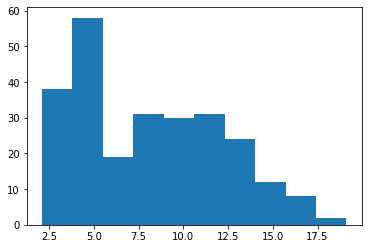

In [12]:
# 対数変換後のTPMの分布を1細胞ごとに確認
plt.hist(tpm_cell_gene_filtered["1 PC3AA"])

(array([ 6., 19., 51., 20., 16., 24., 40., 45., 22., 10.]),
 array([1.13340424, 1.32019498, 1.50698571, 1.69377645, 1.88056718,
        2.06735792, 2.25414865, 2.44093938, 2.62773012, 2.81452085,
        3.00131159]),
 <a list of 10 Patch objects>)

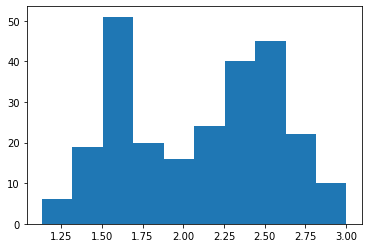

In [15]:
# 対数変換後のTPMの分布を1細胞ごとに確認
plt.hist(tpm_filtered_log["1 PC3AA"])

In [17]:
# 1細胞におけるTPMの総和はだいたい同じ（TPMだからそう。一部遺伝子が削られ、対数変換しているので少しずれている）
for cell in tpm_cell_gene_filtered.columns:
    print(tpm_cell_gene_filtered[cell].sum())

2053.5635277979
2111.2406724002003
2186.2652100228
2145.265623529
1413.4509770879
2618.0165909581
2611.7399379541
2440.7006483261002
2624.7924815206998
2642.8485073659995
2456.6908500924
2663.3789259882997
2386.0673057829
2677.1826224028
2639.7676876697
1861.8475484751998
2201.4993294234
2014.0103293478
2617.4060478562997
1141.8066547145
2482.9203425100995
2819.6054775364
2762.1566764143
1327.927029954
2792.9993009416003
1758.6872293329
1745.5036255679997
1522.3769322199
2044.9976279321
2194.5609451697997
2055.6012506354
2223.4509762556004
2258.0809258547997
2185.5431362440995
2355.3628307792
2117.8155761673997
2405.9765465809
1937.0969117081002
2061.4650881703
2157.8377515342
1878.084630579
2264.7413776541
2695.5319336864
2664.0705190965
2314.2608886134003
2297.8210435914
2408.6867571596995
2623.3040744701
2774.8658040493
1285.0538350341
2377.3265329598
2192.4144387845
1897.3568032412
2486.8216251334
2324.3328651485
2567.9259387386
1890.2092680664
2283.2141580646
2350.6162716951003
16

In [16]:
# 1細胞におけるTPMの総和はだいたい同じ（TPMだからそう。一部遺伝子が削られ、対数変換しているので少しずれている）
for cell in tpm_filtered_log.columns:
    print(tpm_filtered_log[cell].sum())

532.5316379456056
542.5216639291948
551.7319006740051
547.45895413963
433.0826285759183
605.5167492623982
605.7261648730223
581.5789589572239
606.0836139078641
606.8382150951543
584.3756525316888
607.8108394227853
574.5486736518046
610.7174932595979
606.1654976695041
522.0842670914499
550.1783126249819
527.5312143606227
603.6979276335715
386.9367179653824
592.3145416259445
623.6118727569814
619.2681656033035
425.08951983846555
619.8073892325559
491.8004240043126
490.63905574997887
463.0301551147757
533.7551316227175
553.1993296517871
536.5581286668246
555.9705185830055
564.7991473643722
552.1429828802643
577.614611012744
542.4131011345354
581.8624438521069
520.8739571600737
536.9672211622171
548.8101510091365
508.00300417561687
562.3064673442295
613.667283495734
612.1033304089933
574.9633603136908
567.7765367541873
585.0652691387365
604.9952091847339
621.1224781634503
405.41229085995917
577.9968303562107
561.6723282468126
508.9869942668663
590.7250196024801
572.0080506926467
599.795714

In [82]:
# 細胞周期割り当て。まず細胞周期マーカーデータを整理

In [ ]:
# ToDo
# ENSPを考慮してマウスのcc gene増やす→done
# フィルタリングが必要→done
# Variable Gene（必要があれば論文を読む）
# 細胞周期割り当て
# もう一度PCA

# 遺伝子もマーカーから割り当ててみる

# Rotation
# peak timeの具体的な値ごとに分けるのはどうか

In [19]:
# Cyclebaseのhuman_periodic markers
ccmarker_peak = pd.read_csv("data/human_periodic.tsv", sep="\t")
ccmarker_peak

,organism,gene,rank,peaktime,periodicity_pvalue,regulation_pvalue
0,9606,ENSP00000300093,1,93,3.348000e-20,5.325483e-12
1,9606,ENSP00000380256,2,82,2.304000e-21,8.354622e-11
2,9606,ENSP00000211287,3,93,4.662900e-20,3.099938e-11
3,9606,ENSP00000216911,4,90,9.902880e-19,2.048852e-12
4,9606,ENSP00000316121,5,82,5.384700e-20,6.559567e-11
...,...,...,...,...,...,...
373,9606,ENSP00000263382,390,59,7.026322e-08,4.292481e-01
374,9606,ENSP00000303706,392,38,1.276664e-08,2.453469e+00
375,9606,ENSP00000302961,394,15,4.767742e-07,6.722096e-02
376,9606,ENSP00000389014,395,61,6.709085e-08,5.196355e-01


In [17]:
# Cyclebaseのhuman_periodic with peaktime
cb_human = pd.read_csv("cc_markers_data/cyclebase_human.tsv", sep="\t")
cb_human = cb_human[~cb_human["Peaktime"].str.contains("non-periodic")]
cb_human

,Matched name,Primary name,Type,Identifier,Peaktime,rank,Phenotypes
0,PLK1,PLK1,Homo sapiens gene,ENSP00000300093,M,1,M
1,CCNF,CCNF,Homo sapiens gene,ENSP00000380256,G2,2,NaN
2,MAPK13,MAPK13,Homo sapiens gene,ENSP00000211287,M,3,G1
3,AURKA,AURKA,Homo sapiens gene,ENSP00000216911,M,4,"G2/M, M"
4,CDCA8,CDCA8,Homo sapiens gene,ENSP00000316121,G2,5,"G2/M, M"
...,...,...,...,...,...,...,...
389,ASF1B,ASF1B,Homo sapiens gene,ENSP00000263382,S,390,NaN
391,CDC25A,CDC25A,Homo sapiens gene,ENSP00000303706,G1,392,NaN
393,HSPA4,HSPA4,Homo sapiens gene,ENSP00000302961,G1,394,NaN
394,C5orf42,C5orf42,Homo sapiens gene,ENSP00000389014,S,395,NaN


In [18]:
# G1:59, G1/S:37 ,S:36, G2:111, G2/M:39, M:96,
cb_human[cb_human["Peaktime"]=="G2/M"]


,Matched name,Primary name,Type,Identifier,Peaktime,rank,Phenotypes
9,KPNA2,KPNA2,Homo sapiens gene,ENSP00000332455,G2/M,10,NaN
32,BUB1B,BUB1B,Homo sapiens gene,ENSP00000287598,G2/M,33,NaN
33,TACC3,TACC3,Homo sapiens gene,ENSP00000326550,G2/M,34,"G2/M, M"
38,KIF20B,KIF20B,Homo sapiens gene,ENSP00000260753,G2/M,39,NaN
49,CKAP2,CKAP2,Homo sapiens gene,ENSP00000367276,G2/M,50,NaN
55,BORA,BORA,Homo sapiens gene,ENSP00000375082,G2/M,56,NaN
60,MKI67,MKI67,Homo sapiens gene,ENSP00000357643,G2/M,61,NaN
61,EIF5A2,EIF5A2,Homo sapiens gene,ENSP00000295822,G2/M,62,NaN
65,CIT,CIT,Homo sapiens gene,ENSP00000376306,G2/M,66,"G2/M, M"
75,CENPA,CENPA,Homo sapiens gene,ENSP00000336868,G2/M,76,NaN


In [19]:
unannotated_human_cb = cb_human[cb_human["Matched name"].str.contains("ENSP")]["Matched name"]
unannotated_human_cb

63     ENSP00000363647
99     ENSP00000372746
160    ENSP00000373058
250    ENSP00000373080
Name: Matched name, dtype: object

In [21]:
# humanとmouseのGeneID対応 from Ensembl Biomart
human_to_mouse = pd.read_csv("cc_markers_data/mart_export.txt", sep="\t")
human_to_mouse = human_to_mouse[["Protein stable ID", "Mouse gene stable ID", "Mouse gene name"]]
human_to_mouse

,Protein stable ID,Mouse gene stable ID,Mouse gene name
0,ENSP00000354687,ENSMUSG00000064341,mt-Nd1
1,ENSP00000355046,ENSMUSG00000064345,mt-Nd2
2,ENSP00000354499,ENSMUSG00000064351,mt-Co1
3,ENSP00000354876,ENSMUSG00000064354,mt-Co2
4,ENSP00000355265,ENSMUSG00000064356,mt-Atp8
...,...,...,...
163835,ENSP00000394655,ENSMUSG00000094439,Gm21969
163836,ENSP00000394655,ENSMUSG00000041025,Iffo2
163837,ENSP00000386951,ENSMUSG00000045248,Med26
163838,ENSP00000366509,ENSMUSG00000021327,Zkscan3


In [22]:
human_to_mouse[human_to_mouse["Mouse gene name"]=="a"]

,Protein stable ID,Mouse gene stable ID,Mouse gene name
123057,ENSP00000454804,ENSMUSG00000027596,a
123058,ENSP00000364092,ENSMUSG00000027596,a


In [23]:
# unannotated_humna_cbはhuman_to_mouseになかったので無視して良い
for gene in unannotated_human_cb:
    human_to_mouse[human_to_mouse["Protein stable ID"]==gene]

In [24]:
cb_human.set_index("Matched name")

,Primary name,Type,Identifier,Peaktime,rank,Phenotypes
Matched name,,,,,,
PLK1,PLK1,Homo sapiens gene,ENSP00000300093,M,1,M
CCNF,CCNF,Homo sapiens gene,ENSP00000380256,G2,2,NaN
MAPK13,MAPK13,Homo sapiens gene,ENSP00000211287,M,3,G1
AURKA,AURKA,Homo sapiens gene,ENSP00000216911,M,4,"G2/M, M"
CDCA8,CDCA8,Homo sapiens gene,ENSP00000316121,G2,5,"G2/M, M"
...,...,...,...,...,...,...
ASF1B,ASF1B,Homo sapiens gene,ENSP00000263382,S,390,NaN
CDC25A,CDC25A,Homo sapiens gene,ENSP00000303706,G1,392,NaN
HSPA4,HSPA4,Homo sapiens gene,ENSP00000302961,G1,394,NaN


In [25]:
human_to_mouse

,Protein stable ID,Mouse gene stable ID,Mouse gene name
0,ENSP00000354687,ENSMUSG00000064341,mt-Nd1
1,ENSP00000355046,ENSMUSG00000064345,mt-Nd2
2,ENSP00000354499,ENSMUSG00000064351,mt-Co1
3,ENSP00000354876,ENSMUSG00000064354,mt-Co2
4,ENSP00000355265,ENSMUSG00000064356,mt-Atp8
...,...,...,...
163835,ENSP00000394655,ENSMUSG00000094439,Gm21969
163836,ENSP00000394655,ENSMUSG00000041025,Iffo2
163837,ENSP00000386951,ENSMUSG00000045248,Med26
163838,ENSP00000366509,ENSMUSG00000021327,Zkscan3


In [26]:
# mouse cell cycle marker with peaktime
mouse_cb = pd.merge(cb_human, human_to_mouse, left_on="Identifier", right_on="Protein stable ID")
mouse_cb = mouse_cb[["Mouse gene stable ID", "Mouse gene name", "Peaktime", "rank", "Phenotypes"]]
mouse_cb

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
0,ENSMUSG00000030867,Plk1,M,1,M
1,ENSMUSG00000072082,Ccnf,G2,2,NaN
2,ENSMUSG00000004864,Mapk13,M,3,G1
3,ENSMUSG00000027496,Aurka,M,4,"G2/M, M"
4,ENSMUSG00000028873,Cdca8,G2,5,"G2/M, M"
...,...,...,...,...,...
355,ENSMUSG00000005470,Asf1b,S,390,NaN
356,ENSMUSG00000032477,Cdc25a,G1,392,NaN
357,ENSMUSG00000020361,Hspa4,G1,394,NaN
358,ENSMUSG00000039801,Cplane1,S,395,NaN


In [27]:
# 重複しているやつら
mouse_cb[mouse_cb.duplicated("Mouse gene stable ID")]

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
29,ENSMUSG00000055184,Fam72a,G2,28,NaN
226,ENSMUSG00000041219,Arhgap11a,G2,239,NaN
288,ENSMUSG00000050989,Selenon,M,309,NaN


In [28]:
mouse_cb[mouse_cb.duplicated("Mouse gene stable ID", keep="last")]

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
28,ENSMUSG00000055184,Fam72a,G2,27,NaN
225,ENSMUSG00000041219,Arhgap11a,G2,238,NaN
287,ENSMUSG00000050989,Selenon,M,309,NaN


In [29]:
mouse_cb = mouse_cb.drop_duplicates("Mouse gene stable ID")
mouse_cb

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
0,ENSMUSG00000030867,Plk1,M,1,M
1,ENSMUSG00000072082,Ccnf,G2,2,NaN
2,ENSMUSG00000004864,Mapk13,M,3,G1
3,ENSMUSG00000027496,Aurka,M,4,"G2/M, M"
4,ENSMUSG00000028873,Cdca8,G2,5,"G2/M, M"
...,...,...,...,...,...
355,ENSMUSG00000005470,Asf1b,S,390,NaN
356,ENSMUSG00000032477,Cdc25a,G1,392,NaN
357,ENSMUSG00000020361,Hspa4,G1,394,NaN
358,ENSMUSG00000039801,Cplane1,S,395,NaN


In [30]:
# aというsymbolのgeneがあることに驚いた。gene nameはnonagouti / humanではASIP(Agouti-signaling protein)
mouse_cb[mouse_cb["Mouse gene name"]=="a"]

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
261,ENSMUSG00000027596,a,S,280,NaN


In [31]:
# 数数える
# G1:59, G1/S:39, S:30, G2:100, G2/M:40, M:89 →357でok
len(mouse_cb[mouse_cb["Peaktime"]=="M"])

89

In [32]:
mouse_cc_markers = mouse_cb[["Mouse gene name", "Peaktime"]]
mouse_cc_markers

,Mouse gene name,Peaktime
0,Plk1,M
1,Ccnf,G2
2,Mapk13,M
3,Aurka,M
4,Cdca8,G2
...,...,...
355,Asf1b,S
356,Cdc25a,G1
357,Hspa4,G1
358,Cplane1,S


In [33]:
# 357個のmouse cc markerのうち、tpmがあったのは、319個。残りがきになるが一旦先に進む。
# Gene nameがESNPのものを見落としている可能性
hoge = tpm_filtered_log[tpm_filtered_log.index.isin(mouse_cc_markers["Mouse gene name"])].index
mouse_cc_markers = mouse_cc_markers[mouse_cc_markers["Mouse gene name"].isin(hoge)].set_index("Mouse gene name")
mouse_cc_markers

,Peaktime
Mouse gene name,


In [34]:
cb_human = cb_human[["Matched name", "Peaktime"]].set_index("Matched name")
cb_human

,Peaktime
Matched name,
PLK1,M
CCNF,G2
MAPK13,M
AURKA,M
CDCA8,G2
...,...
ASF1B,S
CDC25A,G1
HSPA4,G1


In [35]:
tpm_filtered_log

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
ABCF1,6.003354,12.387758,11.514999,8.688718,6.793900,9.013069,6.748097,4.253332,7.480401,13.279730,...,3.274192,8.807125,11.109395,11.818605,3.793900,8.575260,11.277716,11.466326,8.088521,7.133750
ALAS1,2.558950,11.104558,10.048129,8.465841,2.558950,4.674428,3.973988,3.558950,3.973988,9.816338,...,3.780486,7.616286,7.195710,4.973131,3.973988,8.240774,9.158863,9.240774,8.632199,4.143913
ANLN,5.967119,9.560074,9.026013,8.689585,6.867583,5.967119,8.126318,5.230153,9.417780,11.048913,...,7.500023,7.197460,9.750001,9.460495,7.417780,8.614817,8.841588,10.131691,9.082596,4.060228
ARL6IP1,8.248387,13.513772,12.978849,9.150776,9.304581,11.875426,7.091882,3.314275,3.314275,14.138552,...,4.065851,10.719703,12.884781,12.483636,2.828848,9.796939,12.781589,12.362178,12.479541,11.461843
ATF2,3.623748,8.852567,9.642412,2.623748,3.038786,2.038786,2.623748,3.846141,3.038786,10.657171,...,2.917787,2.502749,3.239715,7.666389,1.038786,3.360714,8.675411,8.072209,2.623748,2.623748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS25,3.797443,8.680086,7.713920,6.230402,5.175955,7.815365,6.282870,3.934946,7.203435,9.093900,...,5.741284,6.408708,7.698215,7.187800,5.723442,7.655424,7.732903,8.541604,5.901780,4.060477
WDR76,8.717487,12.085756,12.457066,10.361044,3.446958,10.696782,9.859739,3.709992,10.007673,10.909665,...,6.764528,10.476809,10.285848,9.922957,8.989216,8.353849,10.403479,10.166689,3.125030,3.932385
ZC3HC1,6.456581,8.783843,9.565880,8.602561,6.949621,8.602561,9.836120,5.746088,8.483053,9.743353,...,8.228060,6.132136,8.019661,8.244836,6.584337,6.891518,9.698873,9.635384,5.987096,3.509049
ZNF367,1.220361,9.344483,9.034142,3.220361,3.805324,1.220361,1.220361,3.805324,2.220361,7.410186,...,2.703337,6.660319,6.739754,8.486988,2.805324,7.307824,7.612679,6.679793,2.805324,1.220361


In [55]:
ave_exprs = {}
for gene in tpm_filtered_log.iterrows():
    #print(gene[1])
    expr_sum = 0
    for count in gene[1]:
        #print(cell)
        expr_sum += np.exp(count)
    ave_expr = np.log(expr_sum / len(gene[1]))
    ave_exprs[gene[0]] = ave_expr

aves = {}
for gene in tpm_cell_gene_filtered.iterrows():
    expr_sum = 0
    for count in gene[1]:
        expr_sum += count
    ave_expr = expr_sum / len(gene[1])
    aves[gene[0]] = ave_expr
#aves    
    
#ave_exprs    
var_exprs = {}
for gene in tpm_cell_gene_filtered.iterrows():
    mse_sum = 0
    for count in gene[1]:
        mse_sum += (count - aves[gene[0]]) ** 2
    mse_ave = mse_sum / len(gene[1])
    var_exprs[gene[0]] = np.log(mse_ave / aves[gene[0]])
var_exprs

{'ABCF1': -1.0812778756177075,
 'ALAS1': -0.803568391134854,
 'ANLN': -0.3145653339525608,
 'ARL6IP1': -1.0591794740907794,
 'ATF2': -0.5909815944589113,
 'BCL6': 0.5133075864289163,
 'BIRC5': -0.49155066112546286,
 'BMP1': -0.08661762171580203,
 'BTBD3': -0.6252399075892029,
 'BUB1': -0.6664028493235963,
 'C15orf23': -1.1646551056663135,
 'C1QB': -0.1476149358914255,
 'C1R': -0.32826473995888716,
 'C1S': -0.5107243681201201,
 'C1orf63': -0.5798765417180262,
 'C3AR1': 0.14936912502880706,
 'C4A': -0.10272497373449387,
 'C5': 0.3716842861974676,
 'C6': -0.0773353067018551,
 'CASP3': -0.3246141625192181,
 'CASP8AP2': -0.7047325818102126,
 'CCL11': -0.17563974823697087,
 'CCL13': -0.9322792873092189,
 'CCL16': -0.47926993729796014,
 'CCL19': 0.0015763726883496435,
 'CCL22': -1.127579708350305,
 'CCL24': -0.8670878425727458,
 'CCL8': -0.28492130323413545,
 'CCNA2': 0.1779560037535109,
 'CCNB2': -0.016293092246674933,
 'CCNE1': 0.4389717086605842,
 'CCNF': -0.34836083197659395,
 'CCR1': 0.0

In [56]:
n_bucket = 20
min_expr = min(ave_exprs.values())
max_expr = max(ave_exprs.values())
print(min_expr)
print(max_expr)
step_size = (max_expr - min_expr) / n_bucket


bucket2gene = {}
gene2bucket = {}
for i in range(1,n_bucket+1):
    bucket2gene[i] = []
for gene in ave_exprs:
    for i in range(1,n_bucket+1): 
        if min_expr + (i-1) * step_size <= ave_exprs[gene] and ave_exprs[gene] <= min_expr + i * step_size:
            bucket2gene[i].append(gene)
            gene2bucket[gene] = i

4.491339965789501
18.89641646902664


In [59]:
normalized_ds = {}
for gene in var_exprs:
    d = var_exprs[gene]
    bucket_num = gene2bucket[gene]
    genes_in_the_bucket = bucket2gene[bucket_num]
    sm = 0
    for gene_in_the_bucket in genes_in_the_bucket:
        sm += var_exprs[gene_in_the_bucket]
    sm = sm / len(genes_in_the_bucket)
    mse_sm  = 0
    for gene_in_the_bucket in genes_in_the_bucket:
        mse_sm += (var_exprs[gene_in_the_bucket] - sm) ** 2
    mse_sm = mse_sm / len(genes_in_the_bucket)
    normalized_d = (d-sm) / math.sqrt(mse_sm)
    normalized_ds[gene] = normalized_d


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [63]:
ave_exprs

{'ABCF1': 12.872022423199176,
 'ALAS1': 10.739202811718352,
 'ANLN': 12.347630072370075,
 'ARL6IP1': 12.205706992853782,
 'ATF2': 9.46233660423372,
 'BCL6': 11.16156963184109,
 'BIRC5': 13.033412724298532,
 'BMP1': 10.619125874148033,
 'BTBD3': 11.019670067119023,
 'BUB1': 6.305297759418987,
 'C15orf23': 12.192156237526873,
 'C1QB': 7.214781599078324,
 'C1R': 11.184595391151873,
 'C1S': 7.643738113879265,
 'C1orf63': 11.114952650502415,
 'C3AR1': 8.312750418295668,
 'C4A': 8.835327816531136,
 'C5': 11.610273353437035,
 'C6': 7.369449307230488,
 'CASP3': 9.897860732905057,
 'CASP8AP2': 5.935121063937285,
 'CCL11': 8.205343560383637,
 'CCL13': 5.732900091612312,
 'CCL16': 6.328533042125037,
 'CCL19': 7.3984333152060735,
 'CCL22': 4.491339965789501,
 'CCL24': 6.176541936554465,
 'CCL8': 6.653797636394194,
 'CCNA2': 12.148872377885015,
 'CCNB2': 11.257304164557477,
 'CCNE1': 10.423364951896358,
 'CCNF': 10.139956404003378,
 'CCR1': 8.083765113102793,
 'CCR3': 9.324445767651538,
 'CCR7': 6.

In [60]:
variable_genes = []
for gene in ave_exprs:
    if 0.2 < ave_exprs[gene] and ave_exprs[gene] < 4 and 0.5 < normalized_ds[gene] and normalized_ds[gene] < 10:
        variable_genes.append(gene)

In [61]:
# 以降面倒なので、vgだけ取り出されたのも同じ名前にする。あとで変える
tpm_filtered_log = tpm_filtered_log[tpm_filtered_log.index.isin(variable_genes)]
tpm_filtered_log

,1 PC3AA,1 PC3AD,1 PC3AE,1 PC3BD,1 PC3BE,10 PC33A,10 PC33B,10 PC33C,10 PC33E,10 PC33F,...,9 PC3AC,9 PC3AD,9 PC3AE,9 PC3AF,9 PC3AG,9 PC3BC,9 PC3BD,9 PC3BE,9 PC3BF,9 PC3BH


In [36]:
tpm_filtered_log_cc = pd.merge(cb_human, tpm_filtered_log, left_index=True, right_index=True)
tpm_filtered_log_cc

,Peaktime,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
CCNF,G2,9.755710,10.554180,12.156467,10.141517,9.570722,10.325435,9.652923,4.115982,9.995127,...,4.048162,9.917878,10.445458,11.578836,10.221516,10.046719,10.876583,11.124010,8.076811,2.308627
CDCA8,G2,7.937357,10.855637,10.600853,7.117336,9.672304,9.854302,9.515578,3.362449,8.505407,...,9.904324,8.428483,10.010257,9.048059,9.456966,9.143808,10.072107,9.901607,6.558846,6.062888
HJURP,G2,7.035308,8.788668,8.642990,8.348968,5.747327,8.674209,8.704766,6.227953,7.615683,...,8.439517,9.921386,10.122909,8.739965,7.738915,8.917252,8.520734,10.064213,7.796795,2.321062
UBE2C,G2,1.749148,7.607129,8.878431,0.749148,6.656039,3.071076,2.334111,0.749148,2.334111,...,4.026402,8.473246,9.381128,8.282724,2.334111,10.322795,5.208580,10.504036,7.656039,5.504036
TPX2,M,8.929182,11.596302,8.968176,9.689670,8.421182,9.012376,3.154395,4.476323,10.988866,...,10.098973,9.942631,12.132694,11.122181,8.955295,9.354067,10.474067,12.129526,10.565906,6.882315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREK1,G2,8.539729,10.313136,9.546423,10.076938,6.039463,3.598891,9.402561,3.791536,3.791536,...,3.867636,2.993166,8.965626,10.109216,8.010704,10.702928,10.380250,8.991208,7.878999,2.376498
NFE2L2,G2,2.892919,12.174463,11.273741,3.477882,8.062844,9.614018,7.296641,3.767388,2.629885,...,3.089693,8.174922,11.008629,11.328300,6.831519,11.147160,8.966168,10.290950,9.335863,8.178321
FAM84B,G1,9.411289,11.381436,9.675003,10.654490,10.226772,10.616109,9.463320,8.664783,10.803219,...,11.219454,3.978710,8.794738,4.130713,10.547310,9.576679,11.174905,10.868496,3.265612,3.265612
HIST1H2AC,S,6.534007,10.096468,9.247074,8.166275,9.115530,9.454573,7.864156,2.726652,8.749020,...,5.627102,6.660269,8.509177,9.155034,5.404724,9.492187,9.982153,7.959313,3.404724,5.614177


In [37]:
tpm_filtered_log_cc_mean = tpm_filtered_log_cc.groupby("Peaktime").mean().reindex(["G1", "G1/S", "S", "G2", "G2/M", "M"])
tpm_filtered_log_cc_mean

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
Peaktime,,,,,,,,,,,,,,,,,,,,,
G1,7.184408,10.897590,10.665744,7.682099,7.856045,7.966660,7.282087,4.991368,6.515561,10.543506,...,6.227099,6.482626,9.057580,8.285461,6.585310,8.227341,9.982788,10.030207,5.963155,4.693686
G1/S,5.273787,11.057880,10.252509,7.833064,6.866467,7.559494,5.359197,3.948463,6.320805,10.529824,...,4.964180,8.053524,9.698315,9.578631,5.543165,7.121776,8.832353,9.448697,6.017000,4.525740
S,7.731517,12.601708,11.673912,8.483627,7.152658,9.827030,7.732933,5.802534,8.999181,11.636036,...,6.982649,9.632031,10.415519,11.232690,7.027213,11.506894,10.479830,11.217324,6.670021,5.930213
G2,5.386572,10.002078,8.827252,6.698083,5.852405,6.505798,5.960558,4.121473,5.957359,10.644134,...,5.482873,6.330412,9.375839,9.075769,5.437169,8.561316,7.882269,9.715755,7.186560,4.858941
G2/M,6.695082,11.109237,10.149024,9.173096,7.224485,8.748221,8.097322,4.762000,7.662721,11.048103,...,6.629418,7.491951,10.598712,9.281116,7.990787,8.289458,10.002047,10.979697,8.907437,6.729702
M,5.869775,9.970494,9.294927,7.284946,6.816661,7.703434,6.612743,5.280020,7.258904,10.847362,...,6.214783,7.244875,9.301394,9.217117,6.005246,8.207146,8.629092,10.032784,7.505400,5.793000


In [39]:
# 細胞周期マーカーの使えそうなやつ
less_corr_markers = []
corr_markers = []
for i in tpm_filtered_log_cc.iterrows():
    peaktime = i[1][0]
    expr = i[1][1:].astype(float)
    mean_expr = tpm_filtered_log_cc_mean[tpm_filtered_log_cc_mean.index==peaktime].loc[peaktime]
    corr = expr.corr(mean_expr)
    if corr <= 0.2:
        less_corr_markers.append(i[0])
    else:
        corr_markers.append(i[0])
    #print(corr)
    
#less_corr_markers

In [40]:
print(len(less_corr_markers))
print(len(corr_markers))

0
104


In [41]:
mouse_cc_markers_corr = mouse_cc_markers[mouse_cc_markers.index.isin(corr_markers)]
mouse_cc_markers_corr

,Peaktime
Mouse gene name,


In [42]:
tpm_filtered_log_cc_corr = pd.merge(mouse_cc_markers_corr, tpm_filtered_log, left_index=True, right_index=True)
tpm_filtered_log_cc_corr

,Peaktime,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G


In [43]:
tpm_filtered_log_cc_corr = tpm_filtered_log_cc

In [44]:
tpm_filtered_log_cc_corr_mean = tpm_filtered_log_cc_corr.groupby("Peaktime").mean().reindex(["G1", "G1/S", "S", "G2", "G2/M", "M"])
tpm_filtered_log_cc_corr_mean

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
Peaktime,,,,,,,,,,,,,,,,,,,,,
G1,7.184408,10.897590,10.665744,7.682099,7.856045,7.966660,7.282087,4.991368,6.515561,10.543506,...,6.227099,6.482626,9.057580,8.285461,6.585310,8.227341,9.982788,10.030207,5.963155,4.693686
G1/S,5.273787,11.057880,10.252509,7.833064,6.866467,7.559494,5.359197,3.948463,6.320805,10.529824,...,4.964180,8.053524,9.698315,9.578631,5.543165,7.121776,8.832353,9.448697,6.017000,4.525740
S,7.731517,12.601708,11.673912,8.483627,7.152658,9.827030,7.732933,5.802534,8.999181,11.636036,...,6.982649,9.632031,10.415519,11.232690,7.027213,11.506894,10.479830,11.217324,6.670021,5.930213
G2,5.386572,10.002078,8.827252,6.698083,5.852405,6.505798,5.960558,4.121473,5.957359,10.644134,...,5.482873,6.330412,9.375839,9.075769,5.437169,8.561316,7.882269,9.715755,7.186560,4.858941
G2/M,6.695082,11.109237,10.149024,9.173096,7.224485,8.748221,8.097322,4.762000,7.662721,11.048103,...,6.629418,7.491951,10.598712,9.281116,7.990787,8.289458,10.002047,10.979697,8.907437,6.729702
M,5.869775,9.970494,9.294927,7.284946,6.816661,7.703434,6.612743,5.280020,7.258904,10.847362,...,6.214783,7.244875,9.301394,9.217117,6.005246,8.207146,8.629092,10.032784,7.505400,5.793000


In [105]:
plt.plot(tpm_filtered_log_cc_corr_mean["G1_cell15_count"])

KeyError: 'G1_cell15_count'

In [45]:
max_phase = []
for i in tpm_filtered_log_cc_corr_mean.iteritems():
    expr = i[1][1:]    
    max_phase.append(expr.index[np.argmax(i[1][1:])])

In [46]:
max_phase_df = pd.DataFrame(max_phase).T
max_phase_df.columns = tpm_filtered_log_cc_corr_mean.columns
max_phase_df.index = ["phase"]
max_phase_df

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
phase,S,S,S,G2/M,G2/M,S,G2/M,S,S,S,...,S,S,G2/M,S,G2/M,S,S,S,G2/M,G2/M


In [47]:
tpm_filtered_log_cc_corr_mean_phase = pd.concat([tpm_filtered_log_cc_corr_mean, max_phase_df])
tpm_filtered_log_cc_corr_mean_phase

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
G1,7.18441,10.8976,10.6657,7.6821,7.85605,7.96666,7.28209,4.99137,6.51556,10.5435,...,6.2271,6.48263,9.05758,8.28546,6.58531,8.22734,9.98279,10.0302,5.96316,4.69369
G1/S,5.27379,11.0579,10.2525,7.83306,6.86647,7.55949,5.3592,3.94846,6.3208,10.5298,...,4.96418,8.05352,9.69831,9.57863,5.54317,7.12178,8.83235,9.4487,6.017,4.52574
S,7.73152,12.6017,11.6739,8.48363,7.15266,9.82703,7.73293,5.80253,8.99918,11.636,...,6.98265,9.63203,10.4155,11.2327,7.02721,11.5069,10.4798,11.2173,6.67002,5.93021
G2,5.38657,10.0021,8.82725,6.69808,5.85241,6.5058,5.96056,4.12147,5.95736,10.6441,...,5.48287,6.33041,9.37584,9.07577,5.43717,8.56132,7.88227,9.71576,7.18656,4.85894
G2/M,6.69508,11.1092,10.149,9.1731,7.22449,8.74822,8.09732,4.762,7.66272,11.0481,...,6.62942,7.49195,10.5987,9.28112,7.99079,8.28946,10.002,10.9797,8.90744,6.7297
M,5.86978,9.97049,9.29493,7.28495,6.81666,7.70343,6.61274,5.28002,7.2589,10.8474,...,6.21478,7.24488,9.30139,9.21712,6.00525,8.20715,8.62909,10.0328,7.5054,5.793
phase,S,S,S,G2/M,G2/M,S,G2/M,S,S,S,...,S,S,G2/M,S,G2/M,S,S,S,G2/M,G2/M


In [48]:
tpm_filtered_log

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
ABCF1,6.003354,12.387758,11.514999,8.688718,6.793900,9.013069,6.748097,4.253332,7.480401,13.279730,...,3.274192,8.807125,11.109395,11.818605,3.793900,8.575260,11.277716,11.466326,8.088521,7.133750
ALAS1,2.558950,11.104558,10.048129,8.465841,2.558950,4.674428,3.973988,3.558950,3.973988,9.816338,...,3.780486,7.616286,7.195710,4.973131,3.973988,8.240774,9.158863,9.240774,8.632199,4.143913
ANLN,5.967119,9.560074,9.026013,8.689585,6.867583,5.967119,8.126318,5.230153,9.417780,11.048913,...,7.500023,7.197460,9.750001,9.460495,7.417780,8.614817,8.841588,10.131691,9.082596,4.060228
ARL6IP1,8.248387,13.513772,12.978849,9.150776,9.304581,11.875426,7.091882,3.314275,3.314275,14.138552,...,4.065851,10.719703,12.884781,12.483636,2.828848,9.796939,12.781589,12.362178,12.479541,11.461843
ATF2,3.623748,8.852567,9.642412,2.623748,3.038786,2.038786,2.623748,3.846141,3.038786,10.657171,...,2.917787,2.502749,3.239715,7.666389,1.038786,3.360714,8.675411,8.072209,2.623748,2.623748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS25,3.797443,8.680086,7.713920,6.230402,5.175955,7.815365,6.282870,3.934946,7.203435,9.093900,...,5.741284,6.408708,7.698215,7.187800,5.723442,7.655424,7.732903,8.541604,5.901780,4.060477
WDR76,8.717487,12.085756,12.457066,10.361044,3.446958,10.696782,9.859739,3.709992,10.007673,10.909665,...,6.764528,10.476809,10.285848,9.922957,8.989216,8.353849,10.403479,10.166689,3.125030,3.932385
ZC3HC1,6.456581,8.783843,9.565880,8.602561,6.949621,8.602561,9.836120,5.746088,8.483053,9.743353,...,8.228060,6.132136,8.019661,8.244836,6.584337,6.891518,9.698873,9.635384,5.987096,3.509049
ZNF367,1.220361,9.344483,9.034142,3.220361,3.805324,1.220361,1.220361,3.805324,2.220361,7.410186,...,2.703337,6.660319,6.739754,8.486988,2.805324,7.307824,7.612679,6.679793,2.805324,1.220361


In [49]:
pca = PCA(n_components=50)
pca.fit(tpm_filtered_log.T)

PCA(n_components=50)

In [50]:
tpm_filtered_log_pca = pd.DataFrame(pca.transform(tpm_filtered_log.T).T)
tpm_filtered_log_pca.columns = tpm_filtered_log.columns
tpm_filtered_log_pca

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
0,27.975270,-35.020275,-26.753313,11.927823,17.769994,6.068104,22.745842,54.696280,25.305673,-37.619321,...,39.026482,16.936452,-16.376009,-14.060968,30.871174,-1.815739,-16.736860,-25.411635,22.141189,48.294510
1,9.002800,1.606470,8.976193,16.444842,16.575638,20.070279,22.594449,6.066358,28.099912,-4.762715,...,25.835722,-25.632592,-1.074732,-18.626366,21.751636,1.473459,13.955820,3.013594,-31.080767,-30.338348
2,10.184303,6.254041,11.139639,7.130639,7.250473,12.928840,4.902307,-5.821192,-9.195620,-3.230587,...,-11.509518,4.008017,-4.422725,-0.886823,-2.159576,-8.911315,9.942147,-4.402714,-7.306127,2.010817
3,3.114018,1.629839,2.214450,-2.995928,-4.195508,-6.003133,-3.543679,6.895995,8.323932,1.510980,...,4.943020,3.639441,-0.439806,8.958011,6.686288,2.855851,5.401642,-3.398809,-1.885391,-4.156212
4,19.463706,-0.656308,0.831835,4.595327,5.393994,-1.812849,1.871774,-0.974823,1.788670,-1.227262,...,1.803347,-6.106211,-3.343495,-1.030385,8.947898,-3.783294,-0.961066,-3.705569,3.923371,1.574016
5,2.614566,-0.770606,-1.025679,-4.223220,-0.254680,-4.136331,-4.872807,3.573093,-2.954958,1.507940,...,0.075486,-4.524654,5.905577,-1.667935,-1.382924,5.556516,7.314659,3.311543,-2.922087,-1.350827
6,-2.590627,1.769257,1.123443,0.315874,5.443470,-2.232778,2.561256,4.021129,-5.073908,0.190749,...,-0.827710,-4.016681,-1.800957,3.344050,0.772261,3.498725,-0.273605,-2.105630,8.514239,10.013747
7,-3.118251,3.341200,-1.934674,7.208093,0.010856,-5.688312,-4.354381,-0.236572,3.481957,-1.437430,...,-2.570204,0.171241,1.023165,1.117467,4.512962,7.635299,-6.485338,-2.222676,0.264564,0.544005
8,1.736517,3.331425,0.446668,0.137205,0.521669,-3.517006,-2.997870,3.818240,-0.256556,0.076344,...,1.073511,5.812794,1.479465,-0.235551,-1.522054,1.829310,-4.307998,0.913713,-4.452001,2.886237
9,-0.355091,3.546708,0.311378,0.783978,-3.881416,-1.471705,-4.440153,4.741122,-3.284476,1.279691,...,-1.153389,3.500311,2.476538,4.052257,-1.122796,2.420532,-1.300229,1.815659,-0.543333,-3.416785


In [121]:
cycle_t = cycle.T
cycle_t.index = ["phase"]
cycle_t

,10 MB1A,10 MB1B,10 MB1C,10 MB1D,10 MB1E,10 MB1F,10 MB1G,10 MB2B,10 MB2C,10 MB2D,...,9 MB5C,9 MB5D,9 MB5E,9 MB5F,9 MB6B,9 MB6C,9 MB6D,9 MB6E,9 MB6F,9 MB6G
phase,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,...,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m


In [51]:
cycle

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
phase,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,g0/g1,s,s,s,...,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m,g2/m


In [52]:
# tpm_filtered_log_pca_phase = pd.concat([tpm_filtered_log_pca, max_phase_df])
tpm_filtered_log_pca_phase = pd.concat([tpm_filtered_log_pca, cycle])
tpm_filtered_log_pca_phase

,10 H91A,10 H91B,10 H91C,10 H91D,10 H91E,10 H91F,10 H91G,10 H94A,10 H94B,10 H94C,...,9 H95D,9 H95E,9 H95F,9 H95G,9 H96A,9 H96B,9 H96C,9 H96D,9 H96E,9 H96G
0,27.9753,-35.0203,-26.7533,11.9278,17.77,6.0681,22.7458,54.6963,25.3057,-37.6193,...,39.0265,16.9365,-16.376,-14.061,30.8712,-1.81574,-16.7369,-25.4116,22.1412,48.2945
1,9.0028,1.60647,8.97619,16.4448,16.5756,20.0703,22.5944,6.06636,28.0999,-4.76271,...,25.8357,-25.6326,-1.07473,-18.6264,21.7516,1.47346,13.9558,3.01359,-31.0808,-30.3383
2,10.1843,6.25404,11.1396,7.13064,7.25047,12.9288,4.90231,-5.82119,-9.19562,-3.23059,...,-11.5095,4.00802,-4.42273,-0.886823,-2.15958,-8.91132,9.94215,-4.40271,-7.30613,2.01082
3,3.11402,1.62984,2.21445,-2.99593,-4.19551,-6.00313,-3.54368,6.89599,8.32393,1.51098,...,4.94302,3.63944,-0.439806,8.95801,6.68629,2.85585,5.40164,-3.39881,-1.88539,-4.15621
4,19.4637,-0.656308,0.831835,4.59533,5.39399,-1.81285,1.87177,-0.974823,1.78867,-1.22726,...,1.80335,-6.10621,-3.34349,-1.03039,8.9479,-3.78329,-0.961066,-3.70557,3.92337,1.57402
5,2.61457,-0.770606,-1.02568,-4.22322,-0.25468,-4.13633,-4.87281,3.57309,-2.95496,1.50794,...,0.0754858,-4.52465,5.90558,-1.66794,-1.38292,5.55652,7.31466,3.31154,-2.92209,-1.35083
6,-2.59063,1.76926,1.12344,0.315874,5.44347,-2.23278,2.56126,4.02113,-5.07391,0.190749,...,-0.82771,-4.01668,-1.80096,3.34405,0.772261,3.49872,-0.273605,-2.10563,8.51424,10.0137
7,-3.11825,3.3412,-1.93467,7.20809,0.0108562,-5.68831,-4.35438,-0.236572,3.48196,-1.43743,...,-2.5702,0.171241,1.02317,1.11747,4.51296,7.6353,-6.48534,-2.22268,0.264564,0.544005
8,1.73652,3.33143,0.446668,0.137205,0.521669,-3.51701,-2.99787,3.81824,-0.256556,0.0763441,...,1.07351,5.81279,1.47947,-0.235551,-1.52205,1.82931,-4.308,0.913713,-4.452,2.88624
9,-0.355091,3.54671,0.311378,0.783978,-3.88142,-1.4717,-4.44015,4.74112,-3.28448,1.27969,...,-1.15339,3.50031,2.47654,4.05226,-1.1228,2.42053,-1.30023,1.81566,-0.543333,-3.41679


In [58]:
tpm_filtered_log_pca_phase_mean = tpm_filtered_log_pca_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_phase_var = tpm_filtered_log_pca_phase_mean.var()
tpm_filtered_log_pca_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
g0/g1,-4.139197,11.423961,7.479248,-2.003412,0.515621,-2.143238,0.588631,0.400671,0.520869,0.784605,...,0.220675,-0.010011,-0.011068,-0.121587,0.181753,-0.113273,0.044193,-0.035509,-0.037625,0.100684
g2/m,0.449470,-5.776408,-2.928752,0.800076,0.038051,1.203411,0.017156,-0.399909,-0.302483,-0.367621,...,0.037329,-0.398012,-0.174191,0.035807,-0.250128,-0.100568,-0.003283,-0.065982,0.211455,-0.118140
s,3.402740,-3.187875,-3.253771,0.850267,-0.552497,0.434361,-0.594781,0.158047,-0.091860,-0.258753,...,-0.265238,0.554055,0.248974,0.069040,0.165679,0.247484,-0.038402,0.124705,-0.252678,0.063851


In [59]:
np.argmax(tpm_filtered_log_pca_phase_var)

1

0     14.443082
1     86.009828
2     37.271635
3      2.667591
4      0.286283
5      3.072586
6      0.350252
7      0.168518
8      0.182951
9      0.404679
10     0.214355
11     0.370181
12     0.092412
13     0.341632
14     0.086171
15     0.030161
16     0.000612
17     0.051496
18     0.001912
19     0.056640
20     0.138757
21     0.019710
22     0.015779
23     0.067597
24     0.038853
25     0.039630
26     0.045608
27     0.064509
28     0.044484
29     0.016788
30     0.026804
31     0.013303
32     0.119537
33     0.041572
34     0.158351
35     0.123690
36     0.016913
37     0.041033
38     0.003246
39     0.047786
40     0.060212
41     0.229191
42     0.045550
43     0.010369
44     0.059946
45     0.041908
46     0.001718
47     0.010493
48     0.053951
49     0.013727
dtype: float64


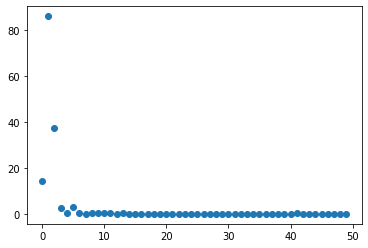

In [60]:
# PC cell cycle score
print(tpm_filtered_log_pca_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_phase_var)
#plt.savefig("p3_pc_cc_score_before.png")

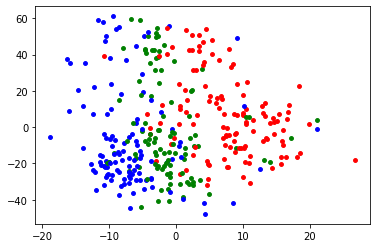

In [126]:
phases = ["g0/g1", "s", "g2/m"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_phase.loc[[2,0,"phase"],:].iteritems():
    #print(i)
    plt.scatter(i[1][2], i[1][0], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.savefig("hoge")
#plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[1,:])
#plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[1,:])

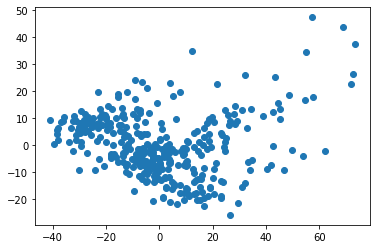

In [33]:
plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[2,:])

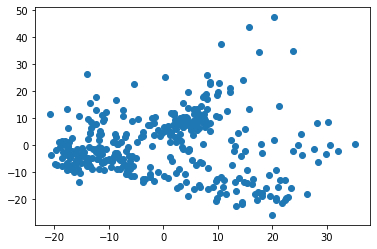

In [34]:
plt.scatter(tpm_filtered_log_pca.loc[1,:], tpm_filtered_log_pca.loc[2,:])

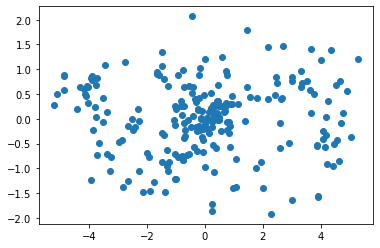

In [57]:
plt.scatter(tpm_filtered_log_pca.loc[1,:], tpm_filtered_log_pca.loc[3,:])

In [35]:
# 超級平面状に一様に点を分布させる
# http://extremelearning.com.au/how-to-evenly-distribute-points-on-a-sphere-more-effectively-than-the-canonical-fibonacci-lattice/
# cell cycle scoreが小さくなるようなviewing axisを見つける
# そのaxisは、phiとthetaで表す。
# ここで求めた、phi, thetaに従い、元PC達を全て、z軸周りに-phi, y軸周りに-theta回転させれば、
n = 10000
goldenRatio = (1 + 5**0.5) / 2
i = np.arange(0, n)
phi = 2 * np.pi * i / goldenRatio
theta = np.arccos(1 - 2*(i+0.5)/n)
x, y, z = np.cos(phi) * np.sin(theta), np.sin(phi) * np.sin(theta), np.cos(theta)

In [36]:
z[0]

0.9999

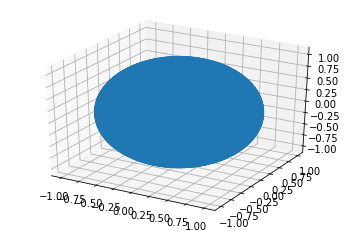

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z)
plt.show()

In [61]:
# x: PC0, y:PC1, z:PC7
tpm_filtered_log_pca_phase_mean[[0,1,7]]

,0,1,7
phase,,,
G1/S,5.201934,2.699912,0.126133
G2/M,0.767485,0.381682,0.085298
M,4.229439,-0.923385,-0.425199
S,-0.632807,-0.248280,-0.047087


In [127]:
# ランダムに選んだviewing axisが上の6点の分散が小さくなるようにする。
# まず選んだviewing axis上に上の6点を射影する。3次元上の点を直線に射影し（あるベクトルから別のベクトルへの射影）、その座標を算出する。
min_cc_score = 10^4
viewing_axis_idx = 0
for idx, (i,j,k) in enumerate(zip(x,y,z)):
    # viewing axisの候補ベクトル
    candidate = np.array([i,j,k])
    ls = []
    for point in tpm_filtered_log_pca_phase_mean[[2,0,3]].iterrows():
        pnt =  np.array(point[1:][0])
        ls.append(np.dot(candidate,pnt))
    cc_score = np.var(ls)
    if cc_score < min_cc_score:
        min_cc_score = cc_score
        viewing_axis_idx = idx

In [128]:
print(viewing_axis_idx)
min_cc_score

4972


0.006068764163336932

In [129]:
optimal_phi = phi[viewing_axis_idx] % (2*np.pi)
optimal_theta = theta[viewing_axis_idx] % (np.pi)

In [130]:
print(np.sin(optimal_phi))
print(np.sin(phi[viewing_axis_idx]))
print(np.cos(optimal_theta))
print(np.cos(theta[viewing_axis_idx]))

-0.750144041946392
-0.7501440419468894
0.00549999999999998
0.00549999999999998


In [131]:
# 50PCたちを、z軸周りに-optimal_phiだけ回転して、y軸周りに-optimal_thetaだけ回転する
# z軸周りに-optimal_phiだけ回転する用の行列
mtrx_phi = np.eye(50)
mtrx_phi[2,2] = np.cos(optimal_phi)
mtrx_phi[2,0] = np.sin(optimal_phi)
mtrx_phi[0,2] = -np.sin(optimal_phi)
mtrx_phi[0,0] = np.cos(optimal_phi)

# y軸周りに-optimal_theta
mtrx_theta = np.eye(50)
mtrx_theta[2,2] = np.cos(optimal_theta)
mtrx_theta[2,3] = -np.sin(optimal_theta)
mtrx_theta[3,2] = np.sin(optimal_theta)
mtrx_theta[3,3] = np.cos(optimal_theta)

In [132]:
tpm_filtered_log_pca_rotated = pd.DataFrame(mtrx_theta.dot(mtrx_phi.dot(tpm_filtered_log_pca)))
tpm_filtered_log_pca_rotated.columns = tpm_filtered_log_pca.columns
tpm_filtered_log_pca_rotated

,10 MB1A,10 MB1B,10 MB1C,10 MB1D,10 MB1E,10 MB1F,10 MB1G,10 MB2B,10 MB2C,10 MB2D,...,9 MB5C,9 MB5D,9 MB5E,9 MB5F,9 MB6B,9 MB6C,9 MB6D,9 MB6E,9 MB6F,9 MB6G
0,-4.147989,14.340127,-11.900379,11.945732,0.748639,14.176468,10.901774,-14.721856,14.580344,8.043705,...,-22.173866,-6.047598,-11.637400,-0.534805,-14.134035,-21.813253,-23.055836,31.564259,-20.357692,5.973451
1,-14.357453,-13.648239,2.231632,13.182702,7.368997,11.876742,-8.460093,-13.962180,-13.209685,-10.874710,...,5.322773,-16.879702,11.914229,-23.479681,20.617011,8.319946,18.035277,-8.160571,-11.895979,14.996473
2,-4.506602,4.573530,3.576431,6.456313,-1.118977,3.004547,4.839865,0.112862,7.679176,4.548249,...,6.551361,-0.623468,7.041498,1.043378,6.248375,4.605880,7.595629,7.791191,-0.041790,-1.362455
3,4.291494,5.659092,30.252559,7.705636,14.738485,4.025588,11.725548,12.129507,-0.636926,31.303889,...,8.775454,-17.266505,-2.616694,-14.088504,8.150890,14.066908,15.572484,-42.233294,8.087804,-19.130622
4,-5.184303,4.936184,2.254408,-6.120106,-10.129865,-7.477953,9.027231,-14.177613,13.632162,8.742507,...,0.313138,-1.064498,-2.670423,-6.498891,-3.570812,-2.573927,1.028834,-0.778248,11.321629,0.816370
5,-5.229984,-5.268240,3.716410,-3.729603,3.698699,-2.244021,-3.555086,-4.452415,-3.655021,5.704200,...,-5.886565,-6.086655,1.308890,-1.406252,-1.270858,8.507339,-0.032193,4.824536,-1.085704,-1.046323
6,-1.408643,-2.429636,0.252323,6.078868,3.510316,0.454298,3.328352,-1.353668,-0.936053,8.089966,...,1.928758,10.796620,2.755859,0.502506,0.653167,3.986663,3.377732,-2.425433,0.428571,-5.015964
7,-1.020958,3.192736,2.915065,-0.343526,-6.573035,-2.869165,1.406447,8.577958,5.983868,-5.904669,...,1.658551,2.633123,-1.378843,3.579521,0.023050,-3.236363,-2.913687,-1.574127,-5.649780,-0.921261
8,-2.629086,-6.040679,-5.105559,2.859452,-0.150450,3.040712,-0.956571,3.507758,0.803723,3.677965,...,-3.611638,10.772514,3.208761,2.955574,1.883566,0.154503,-2.950658,-4.375932,-0.211714,2.849034
9,-1.681217,3.929205,3.263697,1.065116,2.128246,1.130066,-0.345733,-3.062282,1.428755,-6.548101,...,-4.909053,4.190161,-0.926238,5.256135,0.987391,4.476561,-3.105334,0.591134,-1.911372,-0.845023


In [133]:
tpm_filtered_log_pca_rotated_phase = pd.concat([tpm_filtered_log_pca_rotated, cycle_t])
tpm_filtered_log_pca_rotated_phase

,10 MB1A,10 MB1B,10 MB1C,10 MB1D,10 MB1E,10 MB1F,10 MB1G,10 MB2B,10 MB2C,10 MB2D,...,9 MB5C,9 MB5D,9 MB5E,9 MB5F,9 MB6B,9 MB6C,9 MB6D,9 MB6E,9 MB6F,9 MB6G
0,-4.14799,14.3401,-11.9004,11.9457,0.748639,14.1765,10.9018,-14.7219,14.5803,8.04371,...,-22.1739,-6.0476,-11.6374,-0.534805,-14.134,-21.8133,-23.0558,31.5643,-20.3577,5.97345
1,-14.3575,-13.6482,2.23163,13.1827,7.369,11.8767,-8.46009,-13.9622,-13.2097,-10.8747,...,5.32277,-16.8797,11.9142,-23.4797,20.617,8.31995,18.0353,-8.16057,-11.896,14.9965
2,-4.5066,4.57353,3.57643,6.45631,-1.11898,3.00455,4.83987,0.112862,7.67918,4.54825,...,6.55136,-0.623468,7.0415,1.04338,6.24838,4.60588,7.59563,7.79119,-0.0417904,-1.36245
3,4.29149,5.65909,30.2526,7.70564,14.7385,4.02559,11.7255,12.1295,-0.636926,31.3039,...,8.77545,-17.2665,-2.61669,-14.0885,8.15089,14.0669,15.5725,-42.2333,8.0878,-19.1306
4,-5.1843,4.93618,2.25441,-6.12011,-10.1299,-7.47795,9.02723,-14.1776,13.6322,8.74251,...,0.313138,-1.0645,-2.67042,-6.49889,-3.57081,-2.57393,1.02883,-0.778248,11.3216,0.81637
5,-5.22998,-5.26824,3.71641,-3.7296,3.6987,-2.24402,-3.55509,-4.45241,-3.65502,5.7042,...,-5.88657,-6.08666,1.30889,-1.40625,-1.27086,8.50734,-0.0321933,4.82454,-1.0857,-1.04632
6,-1.40864,-2.42964,0.252323,6.07887,3.51032,0.454298,3.32835,-1.35367,-0.936053,8.08997,...,1.92876,10.7966,2.75586,0.502506,0.653167,3.98666,3.37773,-2.42543,0.428571,-5.01596
7,-1.02096,3.19274,2.91507,-0.343526,-6.57303,-2.86917,1.40645,8.57796,5.98387,-5.90467,...,1.65855,2.63312,-1.37884,3.57952,0.0230504,-3.23636,-2.91369,-1.57413,-5.64978,-0.921261
8,-2.62909,-6.04068,-5.10556,2.85945,-0.15045,3.04071,-0.956571,3.50776,0.803723,3.67796,...,-3.61164,10.7725,3.20876,2.95557,1.88357,0.154503,-2.95066,-4.37593,-0.211714,2.84903
9,-1.68122,3.9292,3.2637,1.06512,2.12825,1.13007,-0.345733,-3.06228,1.42876,-6.5481,...,-4.90905,4.19016,-0.926238,5.25614,0.987391,4.47656,-3.10533,0.591134,-1.91137,-0.845023


In [134]:
tpm_filtered_log_pca_rotated_phase_mean = tpm_filtered_log_pca_rotated_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_rotated_phase_var = tpm_filtered_log_pca_rotated_phase_mean.var()
tpm_filtered_log_pca_rotated_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
g0/g1,9.899084,-1.847950,1.636471,0.069968,-1.342001,0.285159,-0.035536,0.540012,-0.535510,0.630687,...,0.062431,-0.250980,0.032341,-0.066328,-0.252963,0.331970,-0.080160,0.074580,0.037591,-0.219083
g2/m,-9.246966,0.879715,2.861410,0.025992,0.741826,-0.292746,0.742520,-0.294922,-0.088173,-0.001934,...,0.139281,0.261288,0.055409,-0.045002,0.183301,-0.180468,0.088983,0.013083,-0.214870,0.084655
s,-1.407177,1.216028,-5.176790,-0.112827,0.767129,-0.010836,-0.793801,-0.312724,0.738795,-0.750972,...,-0.231414,0.005448,-0.101023,0.129890,0.095646,-0.193184,-0.004489,-0.103796,0.197100,0.166284


0     92.644173
1      2.823538
2     18.755609
3      0.009103
4      1.465234
5      0.083510
6      0.590103
7      0.237432
8      0.417973
9      0.478374
10     0.166543
11     1.181954
12     0.003775
13     0.075858
14     0.192874
15     0.042521
16     0.041709
17     0.032119
18     0.012138
19     0.159352
20     0.092976
21     0.000398
22     0.056291
23     0.045838
24     0.019209
25     0.089776
26     0.098219
27     0.021143
28     0.022620
29     0.021536
30     0.117234
31     0.041323
32     0.180371
33     0.084611
34     0.031965
35     0.006955
36     0.043014
37     0.075475
38     0.080362
39     0.053552
40     0.038277
41     0.065604
42     0.007131
43     0.011591
44     0.053256
45     0.089757
46     0.007179
47     0.008210
48     0.043150
49     0.041238
dtype: float64


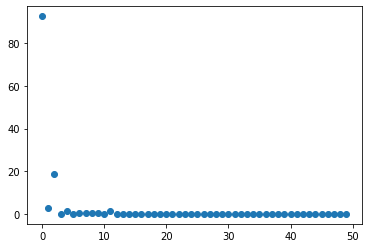

In [135]:
# PC cell cycle score
print(tpm_filtered_log_pca_rotated_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_rotated_phase_var)
plt.savefig("p3_pc_cc_score_after.png")

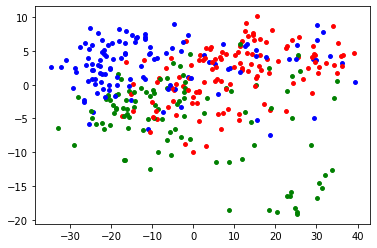

In [136]:
phases = ["g0/g1", "s", "g2/m"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_rotated_phase.loc[[0,2,"phase"],:].iteritems():
    #print(i)
    plt.scatter(i[1][0], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.savefig("hoge")
#plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[1,:])

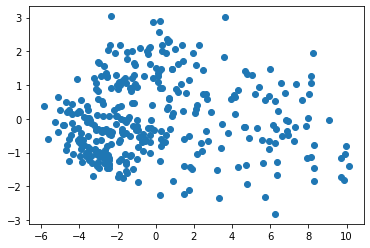

In [129]:
plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[2,:])

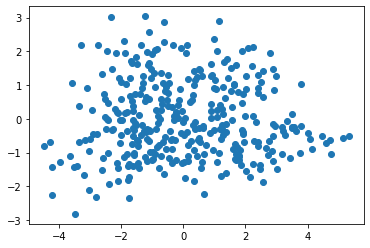

In [130]:
plt.scatter(tpm_filtered_log_pca.loc[1,:], tpm_filtered_log_pca.loc[2,:])

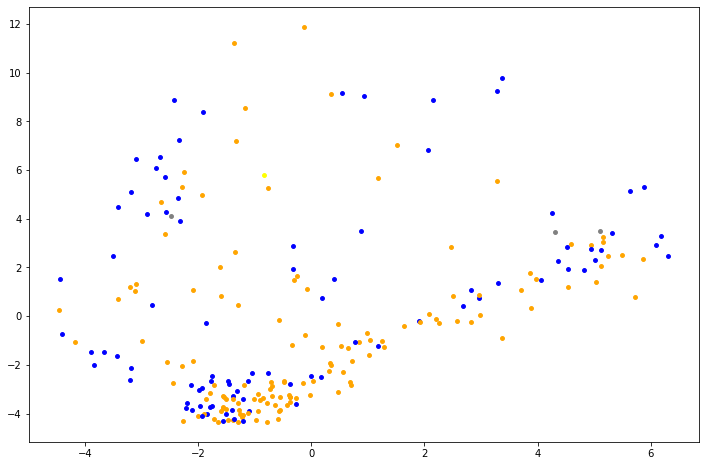

In [74]:
phases = ["G1", "G1/S", "S", "G2", "G2/M", "M"]
colors = ["red", "yellow", "orange", "green", "blue", "gray"]
dc1_dc2_phase = tpm_filtered_log_pca_rotated_phase.loc[[0,1,"phase"],:]
fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_phase.iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

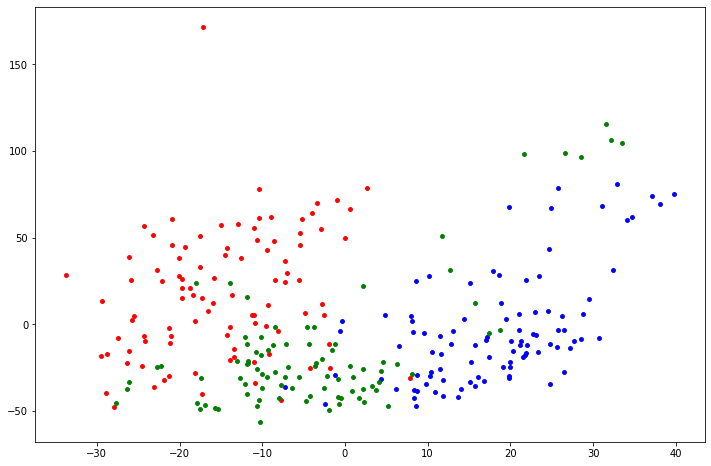

In [465]:
phases = ["G1", "S","G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_phase = tpm_filtered_log_pca_rotated_phase.loc[[0,1],:]
fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_phase.iteritems():
    #print(i[0])
    for phase in phases:
        if phase in i[0]:
            color = colors[phases.index(phase)]
    plt.scatter(i[1][0], i[1][1], c=color, s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

In [ ]:
# ここまではcc_markersでccを割り当てて、それに基づいてPCA cc scoreを出して、回転していたが、
# 既にあるlabelで、PCA cc scoreを出して回転して描画してみる！！

In [511]:
phases = ["G1", "S","G2M"]
hoechst_phase = []
for i in tpm_filtered_log_pca.iteritems():
    for phase in phases:
        if phase in i[0]:
            hoechst_phase.append(phase)
            
hoechst_phase_df = pd.DataFrame(hoechst_phase).T
hoechst_phase_df.index = ["phase"]
hoechst_phase_df.columns = tpm_filtered_log_pca.columns
tpm_filtered_log_pca_hoechst_phase = pd.concat([tpm_filtered_log_pca, hoechst_phase_df, ])
tpm_filtered_log_pca_hoechst_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,47.736,41.5736,12.564,70.2526,78.4094,-0.176452,34.466,9.5427,-3.83703,-7.76136,...,13.5335,102.928,-51.0401,101.356,-18.3813,-45.5793,-31.8851,119.242,109.847,108.685
1,22.1745,24.6105,22.0815,15.4249,6.79959,43.7088,35.5495,12.8112,18.8932,15.5046,...,-9.42295,-29.0224,18.3027,-19.5018,18.0942,-13.3598,-11.343,-23.6799,-24.6903,-29.5148
2,8.89106,-8.40387,-10.9933,3.18598,-6.49198,-34.7221,2.6992,14.5185,4.97561,1.68367,...,20.2834,61.9841,32.3794,59.7218,34.6272,13.7117,13.6645,59.5232,68.0715,64.1134
3,-16.4685,-21.545,-3.78082,-8.54042,-11.5831,51.1658,-22.935,-33.277,-32.8823,-12.3744,...,-6.69481,15.9298,-1.31304,12.6419,-4.8122,1.50468,1.54365,17.4082,16.2697,12.9171
4,3.57256,-10.1756,-10.4502,-1.69889,-3.51366,-10.0038,-0.774579,-1.82582,4.1799,-17.655,...,4.35985,5.5884,-4.9171,2.97112,-9.71299,-4.56988,-0.375392,5.50019,-1.17507,7.14479
5,8.21851,-7.91858,16.0837,5.24186,7.14491,26.4509,-2.20653,8.30287,11.0514,17.0916,...,-25.2026,5.86728,7.66797,15.2018,-2.67938,-8.43258,-1.0114,1.04748,12.2331,13.8316
6,1.51806,5.13557,-11.2837,12.7894,0.623539,-10.1455,7.68248,-8.8013,-3.35828,-3.69292,...,5.06981,-37.8296,-1.74265,-30.0965,8.25986,-0.251474,-4.6752,-27.3975,-56.2957,-51.4066
7,-20.8902,-1.82946,1.94886,-7.60804,-1.40215,-13.8076,-7.26248,0.339074,-1.92166,2.40428,...,-11.5843,8.66509,-5.67328,4.59581,-8.18349,1.81016,2.91996,-3.67273,-4.7584,-0.971466
8,-12.1622,-15.1405,-20.6522,-3.89785,-1.39461,6.94102,-5.09557,-14.7251,-6.82225,0.578559,...,-5.13464,10.554,-8.10832,7.92758,-17.0364,-18.1121,-7.82134,8.45459,-3.025,-2.55766
9,-5.67545,-2.79616,5.08965,4.27343,-0.579237,11.6649,6.23352,-2.27806,-3.62836,-13.0556,...,4.9759,15.6179,-12.2035,11.8484,-8.62769,1.37379,0.841497,1.08124,33.9792,24.8985


In [478]:
tpm_filtered_log_pca_hoechst_phase_mean = tpm_filtered_log_pca_hoechst_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_hoechst_phase_var = tpm_filtered_log_pca_hoechst_phase_mean.var()
tpm_filtered_log_pca_hoechst_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
G1,16.052910,15.881995,-7.215280,-4.954854,-1.091812,4.458744,-1.127092,6.163595,0.310529,1.590154,...,-0.014173,0.273625,-0.272841,0.378015,0.665685,-0.322473,-0.724851,-0.068865,0.320882,0.013804
G2M,-1.156497,-18.715588,-6.942323,-2.360250,-3.766710,2.979241,2.539091,-5.548791,1.407348,-1.330521,...,-0.010398,-0.024178,-0.184123,0.123046,-0.016117,0.592899,-0.254757,0.413953,-0.190243,0.127157
S,-16.250633,3.091193,15.444658,7.980114,5.300206,-8.114166,-1.540363,-0.670695,-1.874048,-0.283236,...,0.026805,-0.272123,0.498506,-0.546612,-0.708620,-0.295010,1.068663,-0.376460,-0.142515,-0.153776


0     261.252585
1     306.022175
2     169.120701
3      46.828087
4      21.703658
5      47.221777
6       5.042271
7      34.613884
8       2.790492
9       2.189456
10      0.725909
11      0.256498
12      0.472878
13      0.304977
14      0.574230
15      1.037449
16      0.898970
17      0.082896
18      0.147163
19      0.878546
20      0.142112
21      0.053791
22      0.087866
23      2.161760
24      0.301269
25      0.493066
26      0.133081
27      0.015895
28      0.256023
29      0.259483
30      0.216951
31      0.157452
32      0.336429
33      0.929528
34      0.117125
35      0.163895
36      0.145618
37      0.163536
38      0.255084
39      0.786249
40      0.000513
41      0.074667
42      0.178138
43      0.228064
44      0.472189
45      0.271174
46      0.864853
47      0.158747
48      0.079710
49      0.019976
dtype: float64


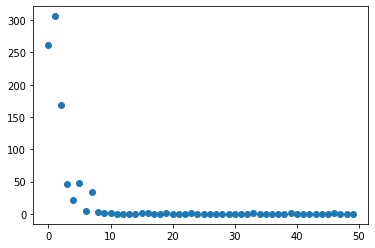

In [480]:
print(tpm_filtered_log_pca_hoechst_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_hoechst_phase_var)

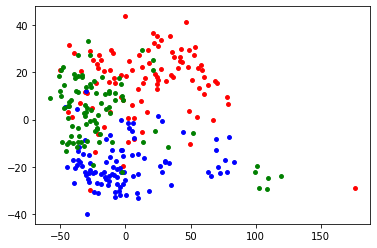

In [518]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_hoechst_phase.loc[[0,1,"phase"],:].iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)

#plt.scatter(tpm_filtered_log_pca_hoechst_phase.loc[0,:], tpm_filtered_log_pca_hoechst_phase.loc[1,:])

In [514]:
tpm_filtered_log_pca_hoechst_phase.loc[[0,1,"phase"],:]

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,47.736,41.5736,12.564,70.2526,78.4094,-0.176452,34.466,9.5427,-3.83703,-7.76136,...,13.5335,102.928,-51.0401,101.356,-18.3813,-45.5793,-31.8851,119.242,109.847,108.685
1,22.1745,24.6105,22.0815,15.4249,6.79959,43.7088,35.5495,12.8112,18.8932,15.5046,...,-9.42295,-29.0224,18.3027,-19.5018,18.0942,-13.3598,-11.343,-23.6799,-24.6903,-29.5148
phase,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,...,S,S,S,S,S,S,S,S,S,S


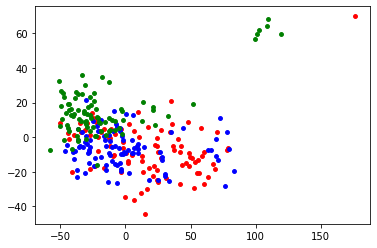

In [522]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_hoechst_phase.loc[[0,2,"phase"],:].iteritems():
    plt.scatter(i[1][0], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)

#plt.scatter(tpm_filtered_log_pca_hoechst_phase.loc[0,:], tpm_filtered_log_pca_hoechst_phase.loc[1,:])
#plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[2,:])

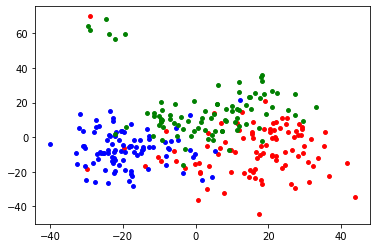

In [523]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_hoechst_phase.loc[[1,2,"phase"],:].iteritems():
    plt.scatter(i[1][1], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)

#plt.scatter(tpm_filtered_log_pca_hoechst_phase.loc[0,:], tpm_filtered_log_pca_hoechst_phase.loc[1,:])

In [493]:
# ランダムに選んだviewing axisが上の6点の分散が小さくなるようにする。
# まず選んだviewing axis上に上の6点を射影する。3次元上の点を直線に射影し（あるベクトルから別のベクトルへの射影）、その座標を算出する。
min_cc_score = 10^4
viewing_axis_idx = 0
for idx, (i,j,k) in enumerate(zip(x,y,z)):
    # viewing axisの候補ベクトル
    candidate = np.array([i,j,k])
    ls = []
    for point in tpm_filtered_log_pca_hoechst_phase_mean[[0,1,2]].iterrows():
        pnt =  np.array(point[1:][0])
        ls.append(np.dot(candidate,pnt))
    cc_score = np.var(ls)
    if cc_score < min_cc_score:
        min_cc_score = cc_score
        viewing_axis_idx = idx

In [494]:
print(viewing_axis_idx)
min_cc_score

8552


0.03137496857526364

In [495]:
optimal_phi = phi[viewing_axis_idx] % (2*np.pi)
optimal_theta = theta[viewing_axis_idx] % (np.pi)

In [496]:
print(np.sin(optimal_phi))
print(np.sin(phi[viewing_axis_idx]))
print(np.cos(optimal_theta))
print(np.cos(theta[viewing_axis_idx]))

0.4446063502916297
0.4446063502927892
-0.7104999999999998
-0.7104999999999998


In [497]:
# 50PCたちを、z軸周りに-optimal_phiだけ回転して、y軸周りに-optimal_thetaだけ回転する
# z軸周りに-optimal_phiだけ回転する用の行列
mtrx_phi = np.eye(50)
mtrx_phi[0,0] = np.cos(optimal_phi)
mtrx_phi[0,1] = np.sin(optimal_phi)
mtrx_phi[1,0] = -np.sin(optimal_phi)
mtrx_phi[1,1] = np.cos(optimal_phi)

# y軸周りに-optimal_theta
mtrx_theta = np.eye(50)
mtrx_theta[0,0] = np.cos(optimal_theta)
mtrx_theta[0,2] = -np.sin(optimal_theta)
mtrx_theta[2,0] = np.sin(optimal_theta)
mtrx_theta[2,2] = np.cos(optimal_theta)

In [498]:
tpm_filtered_log_pca_hoechst_rotated = pd.DataFrame(mtrx_theta.dot(mtrx_phi.dot(tpm_filtered_log_pca)))
tpm_filtered_log_pca_hoechst_rotated.columns = tpm_filtered_log_pca.columns
tpm_filtered_log_pca_hoechst_rotated

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,17.118445,24.597538,8.756481,37.595092,52.321255,10.514275,8.805375,-8.190504,-11.911473,-11.022017,...,-2.683807,31.054882,-61.049629,28.638633,-41.780994,-34.435920,-26.324543,41.481379,29.805588,33.375933
1,-41.086053,-40.528131,-25.364994,-45.051227,-40.951895,-39.072616,-47.166469,-15.718033,-15.217124,-10.437117,...,2.423281,-19.766424,6.298561,-27.595159,-8.035002,32.231585,24.336543,-31.805122,-26.722746,-21.885094
2,-29.468342,-12.533914,6.800023,-41.719268,-42.683100,38.456360,-12.520080,-12.322170,4.794457,8.546786,...,-25.889970,-117.997633,14.892374,-112.420462,-7.355424,14.807501,6.840328,-124.860640,-125.328083,-123.293392
3,-16.468509,-21.544981,-3.780822,-8.540416,-11.583105,51.165790,-22.934953,-33.277045,-32.882339,-12.374375,...,-6.694805,15.929850,-1.313040,12.641934,-4.812198,1.504676,1.543647,17.408184,16.269707,12.917083
4,3.572560,-10.175615,-10.450195,-1.698892,-3.513657,-10.003787,-0.774579,-1.825822,4.179898,-17.654988,...,4.359845,5.588399,-4.917097,2.971125,-9.712994,-4.569877,-0.375392,5.500194,-1.175068,7.144786
5,8.218512,-7.918581,16.083695,5.241857,7.144909,26.450930,-2.206531,8.302874,11.051375,17.091600,...,-25.202645,5.867277,7.667973,15.201777,-2.679385,-8.432576,-1.011396,1.047483,12.233108,13.831641
6,1.518061,5.135572,-11.283707,12.789442,0.623539,-10.145467,7.682485,-8.801299,-3.358279,-3.692922,...,5.069807,-37.829644,-1.742649,-30.096497,8.259860,-0.251474,-4.675203,-27.397533,-56.295668,-51.406640
7,-20.890176,-1.829459,1.948862,-7.608041,-1.402153,-13.807554,-7.262483,0.339074,-1.921657,2.404280,...,-11.584275,8.665087,-5.673278,4.595811,-8.183492,1.810156,2.919964,-3.672728,-4.758401,-0.971466
8,-12.162181,-15.140478,-20.652178,-3.897850,-1.394606,6.941020,-5.095570,-14.725121,-6.822250,0.578559,...,-5.134641,10.554038,-8.108317,7.927583,-17.036388,-18.112114,-7.821342,8.454588,-3.024999,-2.557660
9,-5.675454,-2.796159,5.089650,4.273427,-0.579237,11.664910,6.233518,-2.278055,-3.628362,-13.055595,...,4.975902,15.617858,-12.203540,11.848393,-8.627690,1.373794,0.841497,1.081240,33.979220,24.898490


In [500]:
tpm_filtered_log_pca_hoechst_rotated_phase = pd.concat([hoechst_phase_df, tpm_filtered_log_pca_hoechst_rotated])
tpm_filtered_log_pca_hoechst_rotated_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
phase,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,...,S,S,S,S,S,S,S,S,S,S
0,17.1184,24.5975,8.75648,37.5951,52.3213,10.5143,8.80538,-8.1905,-11.9115,-11.022,...,-2.68381,31.0549,-61.0496,28.6386,-41.781,-34.4359,-26.3245,41.4814,29.8056,33.3759
1,-41.0861,-40.5281,-25.365,-45.0512,-40.9519,-39.0726,-47.1665,-15.718,-15.2171,-10.4371,...,2.42328,-19.7664,6.29856,-27.5952,-8.035,32.2316,24.3365,-31.8051,-26.7227,-21.8851
2,-29.4683,-12.5339,6.80002,-41.7193,-42.6831,38.4564,-12.5201,-12.3222,4.79446,8.54679,...,-25.89,-117.998,14.8924,-112.42,-7.35542,14.8075,6.84033,-124.861,-125.328,-123.293
3,-16.4685,-21.545,-3.78082,-8.54042,-11.5831,51.1658,-22.935,-33.277,-32.8823,-12.3744,...,-6.69481,15.9298,-1.31304,12.6419,-4.8122,1.50468,1.54365,17.4082,16.2697,12.9171
4,3.57256,-10.1756,-10.4502,-1.69889,-3.51366,-10.0038,-0.774579,-1.82582,4.1799,-17.655,...,4.35985,5.5884,-4.9171,2.97112,-9.71299,-4.56988,-0.375392,5.50019,-1.17507,7.14479
5,8.21851,-7.91858,16.0837,5.24186,7.14491,26.4509,-2.20653,8.30287,11.0514,17.0916,...,-25.2026,5.86728,7.66797,15.2018,-2.67938,-8.43258,-1.0114,1.04748,12.2331,13.8316
6,1.51806,5.13557,-11.2837,12.7894,0.623539,-10.1455,7.68248,-8.8013,-3.35828,-3.69292,...,5.06981,-37.8296,-1.74265,-30.0965,8.25986,-0.251474,-4.6752,-27.3975,-56.2957,-51.4066
7,-20.8902,-1.82946,1.94886,-7.60804,-1.40215,-13.8076,-7.26248,0.339074,-1.92166,2.40428,...,-11.5843,8.66509,-5.67328,4.59581,-8.18349,1.81016,2.91996,-3.67273,-4.7584,-0.971466
8,-12.1622,-15.1405,-20.6522,-3.89785,-1.39461,6.94102,-5.09557,-14.7251,-6.82225,0.578559,...,-5.13464,10.554,-8.10832,7.92758,-17.0364,-18.1121,-7.82134,8.45459,-3.025,-2.55766


In [501]:
tpm_filtered_log_pca_hoechst_rotated_phase_mean = tpm_filtered_log_pca_hoechst_rotated_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_hoechst_rotated_phase_var = tpm_filtered_log_pca_hoechst_rotated_phase_mean.var()
tpm_filtered_log_pca_hoechst_rotated_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
G1,10.276651,-21.363143,-0.023041,-4.954854,-1.091812,4.458744,-1.127092,6.163595,0.310529,1.590154,...,-0.014173,0.273625,-0.272841,0.378015,0.665685,-0.322473,-0.724851,-0.068865,0.320882,0.013804
G2M,10.061403,17.278226,-0.194030,-2.360250,-3.766710,2.979241,2.539091,-5.548791,1.407348,-1.330521,...,-0.010398,-0.024178,-0.184123,0.123046,-0.016117,0.592899,-0.254757,0.413953,-0.190243,0.127157
S,-22.186968,4.456273,0.236804,7.980114,5.300206,-8.114166,-1.540363,-0.670695,-1.874048,-0.283236,...,0.026805,-0.272123,0.498506,-0.546612,-0.708620,-0.295010,1.068663,-0.376460,-0.142515,-0.153776


0     348.981721
1     387.366677
2       0.047062
3      46.828087
4      21.703658
5      47.221777
6       5.042271
7      34.613884
8       2.790492
9       2.189456
10      0.725909
11      0.256498
12      0.472878
13      0.304977
14      0.574230
15      1.037449
16      0.898970
17      0.082896
18      0.147163
19      0.878546
20      0.142112
21      0.053791
22      0.087866
23      2.161760
24      0.301269
25      0.493066
26      0.133081
27      0.015895
28      0.256023
29      0.259483
30      0.216951
31      0.157452
32      0.336429
33      0.929528
34      0.117125
35      0.163895
36      0.145618
37      0.163536
38      0.255084
39      0.786249
40      0.000513
41      0.074667
42      0.178138
43      0.228064
44      0.472189
45      0.271174
46      0.864853
47      0.158747
48      0.079710
49      0.019976
dtype: float64


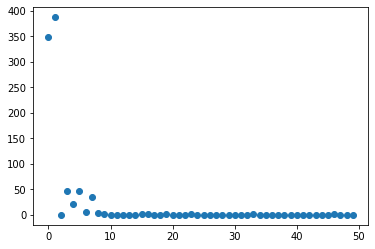

In [503]:
# PC cell cycle score
print(tpm_filtered_log_pca_hoechst_rotated_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_hoechst_rotated_phase_var)

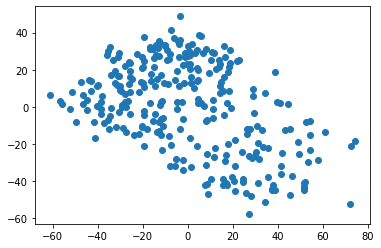

In [504]:
plt.scatter(tpm_filtered_log_pca_hoechst_rotated.loc[0,:], tpm_filtered_log_pca_hoechst_rotated.loc[1,:])

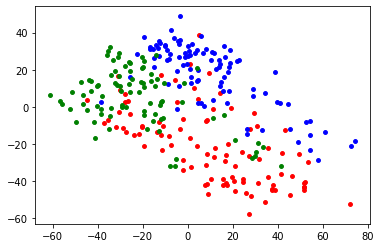

In [519]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_hoechst_phase = tpm_filtered_log_pca_hoechst_rotated_phase.loc[[0,1,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_hoechst_phase.iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

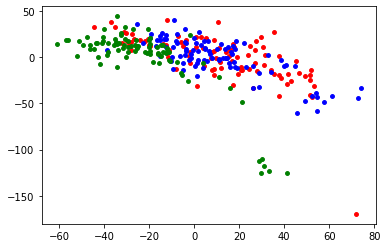

In [524]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_hoechst_phase = tpm_filtered_log_pca_hoechst_rotated_phase.loc[[0,2,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_hoechst_phase.iteritems():
    plt.scatter(i[1][0], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

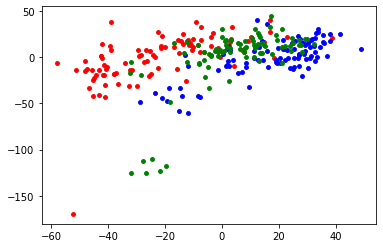

In [525]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_hoechst_phase = tpm_filtered_log_pca_hoechst_rotated_phase.loc[[1,2,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_hoechst_phase.iteritems():
    plt.scatter(i[1][1], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

In [507]:
tpm_filtered_log_pca_hoechst_rotated_marker_phase = pd.concat([tpm_filtered_log_pca_hoechst_rotated, max_phase_df])
tpm_filtered_log_pca_hoechst_rotated_marker_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,17.1184,24.5975,8.75648,37.5951,52.3213,10.5143,8.80538,-8.1905,-11.9115,-11.022,...,-2.68381,31.0549,-61.0496,28.6386,-41.781,-34.4359,-26.3245,41.4814,29.8056,33.3759
1,-41.0861,-40.5281,-25.365,-45.0512,-40.9519,-39.0726,-47.1665,-15.718,-15.2171,-10.4371,...,2.42328,-19.7664,6.29856,-27.5952,-8.035,32.2316,24.3365,-31.8051,-26.7227,-21.8851
2,-29.4683,-12.5339,6.80002,-41.7193,-42.6831,38.4564,-12.5201,-12.3222,4.79446,8.54679,...,-25.89,-117.998,14.8924,-112.42,-7.35542,14.8075,6.84033,-124.861,-125.328,-123.293
3,-16.4685,-21.545,-3.78082,-8.54042,-11.5831,51.1658,-22.935,-33.277,-32.8823,-12.3744,...,-6.69481,15.9298,-1.31304,12.6419,-4.8122,1.50468,1.54365,17.4082,16.2697,12.9171
4,3.57256,-10.1756,-10.4502,-1.69889,-3.51366,-10.0038,-0.774579,-1.82582,4.1799,-17.655,...,4.35985,5.5884,-4.9171,2.97112,-9.71299,-4.56988,-0.375392,5.50019,-1.17507,7.14479
5,8.21851,-7.91858,16.0837,5.24186,7.14491,26.4509,-2.20653,8.30287,11.0514,17.0916,...,-25.2026,5.86728,7.66797,15.2018,-2.67938,-8.43258,-1.0114,1.04748,12.2331,13.8316
6,1.51806,5.13557,-11.2837,12.7894,0.623539,-10.1455,7.68248,-8.8013,-3.35828,-3.69292,...,5.06981,-37.8296,-1.74265,-30.0965,8.25986,-0.251474,-4.6752,-27.3975,-56.2957,-51.4066
7,-20.8902,-1.82946,1.94886,-7.60804,-1.40215,-13.8076,-7.26248,0.339074,-1.92166,2.40428,...,-11.5843,8.66509,-5.67328,4.59581,-8.18349,1.81016,2.91996,-3.67273,-4.7584,-0.971466
8,-12.1622,-15.1405,-20.6522,-3.89785,-1.39461,6.94102,-5.09557,-14.7251,-6.82225,0.578559,...,-5.13464,10.554,-8.10832,7.92758,-17.0364,-18.1121,-7.82134,8.45459,-3.025,-2.55766
9,-5.67545,-2.79616,5.08965,4.27343,-0.579237,11.6649,6.23352,-2.27806,-3.62836,-13.0556,...,4.9759,15.6179,-12.2035,11.8484,-8.62769,1.37379,0.841497,1.08124,33.9792,24.8985


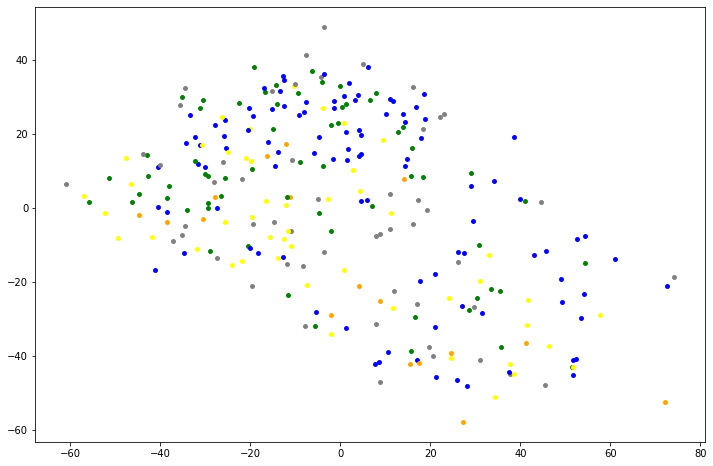

In [509]:
phases = ["G1", "G1/S", "S", "G2", "G2/M", "M"]
colors = ["red", "yellow", "orange", "green", "blue", "gray"]
dc1_dc2_phase = tpm_filtered_log_pca_hoechst_rotated_marker_phase.loc[[0,1,"phase"],:]
fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_phase.iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

In [502]:
tpm_pca_val_hoechst_phase_mean = tpm_pca_val_hoechst_phase.groupby("Phase").mean()
tpm_pca_val_hoechst_phase_mean

NameError: name 'tpm_pca_val_hoechst_phase' is not defined

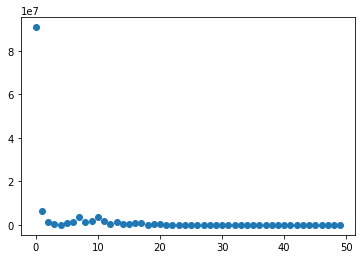

In [78]:
plt.scatter(np.arange(50), tpm_pca_val_phase_mean.var())

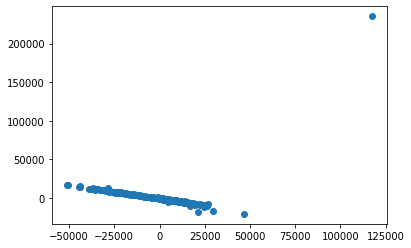

In [80]:
plt.scatter(tpm_val_phase[0], tpm_val_phase[1])

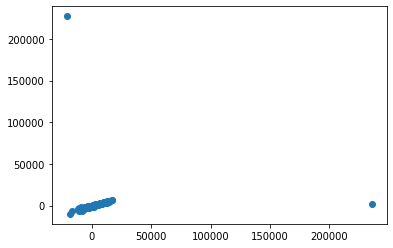

In [82]:
plt.scatter(tpm_val_phase[1], tpm_val_phase[2])

In [5]:
# scLVMのサプリTable1。GOとCyclebaseから取ってきて、マウスの細胞周期マーカーに対応させたもののリスト
# scLVMでは、周期の相はおそらく重要ではないので、周期に関する情報は載っていない。
df_cell_cycle_genes = pd.read_csv("data/cell_cycle_genes.csv", header=None)
df_cell_cycle_genes

,0
0,ENSMUSG00000019256
1,ENSMUSG00000021866
2,ENSMUSG00000017716
3,ENSMUSG00000007815
4,ENSMUSG00000034218
...,...
887,ENSMUSG00000067367
888,ENSMUSG00000012126
889,ENSMUSG00000078773
890,ENSMUSG00000032309


In [147]:
# scLVMのサプリデータ1。サプリノートに書いてある基準に従って、前処理されたmESCのデータ。181個のうちG1, S, G2/Mがそれぞれどれだけあるかはわかるが、どのcellに対応しているかはわからない。
# 181 cellはいくつかのフィルタリングを突破したもの。9571はある基準による発現変動遺伝子
# ERCC spike inがわからない。
df_mESC = pd.read_csv("data/mESC_expr_modified.csv").iloc[:, 1:]
df_mESC

,Gnai3,Cdc45,H19,Scml2,Narf,Klf6,Scmh1,Cox5a,Tbx4,Ngfr,...,AC148981.1,AC127583.1,AL844859.1,AC137970.1,AC124446.1,AC154625.1,AL714024.1,AC102860.1,AC147987.1,AC132389.挀
0,1.736329,2.592285,0.0,0.000000,1.126923,2.526728,0.912525,2.438271,1.865751,0.218098,...,0.0,0.629581,0.000000,0.0,0.218098,0.000000,0.0,0.0,0.000000,0.000000
1,0.735282,0.994408,0.0,0.000000,0.000000,0.275820,0.000000,2.546955,0.000000,0.000000,...,0.0,2.665802,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.275820
2,2.139447,1.760671,0.0,2.789649,1.223532,2.013907,0.000000,2.399897,0.000000,0.757351,...,0.0,0.000000,0.000000,0.0,0.000000,2.614464,0.0,0.0,2.694575,2.338642
3,1.504497,1.667269,0.0,0.461651,0.618922,2.254700,0.000000,2.337785,0.212633,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.781997,6.000000
4,2.805749,0.738761,0.0,0.000000,0.600592,2.377355,0.000000,2.322333,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.242200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2.336024,2.623846,0.0,0.894883,0.000000,2.803703,0.000000,3.020811,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000
178,2.374555,0.000000,0.0,2.019998,0.960675,2.534839,0.000000,3.295252,0.000000,1.047970,...,0.0,0.481955,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.156398,0.000000
179,3.244377,2.939645,0.0,2.349497,0.000000,2.960306,0.000000,3.101223,0.000000,2.814872,...,0.0,2.617445,0.799362,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
180,0.540454,2.692608,0.0,0.000000,2.534023,0.540454,0.000000,2.784521,0.000000,1.449956,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,9.000000


In [139]:
var_genes = list(df_mESC.columns)
var_genes

['Gnai3',
 'Cdc45',
 'H19',
 'Scml2',
 'Narf',
 'Klf6',
 'Scmh1',
 'Cox5a',
 'Tbx4',
 'Ngfr',
 'Wnt3',
 'Fer',
 'Xpo6',
 'Tfe3',
 'Gna12',
 'Slc22a18',
 'Dlat',
 'Ccnd2',
 'Gpr107',
 'Slfn4',
 'Drp2',
 'Tspan32',
 'Gmpr',
 'Trim25',
 'Dgke',
 'Itgb2',
 'Pemt',
 'Cdh1',
 'Ckmt1',
 'Alox12',
 'Arvcf',
 'Comt',
 'Rtcd1',
 'Dbt',
 'Dazap2',
 'Trappc10',
 'Ccm2',
 'Tbrg4',
 'Ndufa9',
 'Lck',
 'Galnt1',
 'Mkrn2',
 'Raf1',
 'Acvr1b',
 'Tom1l2',
 'Itga5',
 'Wdr77',
 'Gm2a',
 'Krit1',
 'Clcn4-2',
 'Sema4f',
 'Hk2',
 'Myo18a',
 'Haao',
 'Kat2b',
 'Cryba1',
 'Dnmt3l',
 'Aire',
 'Spg7',
 'Sult5a1',
 'Rpl13',
 'Chmp1a',
 'Rpa1',
 'Tubgcp3',
 'Polr3d',
 'Tcf7',
 'Il12rb1',
 'Slc5a5',
 'Usp32',
 'Txnrd3',
 'Znf512b',
 'Dnajc5',
 'Fmr1',
 'Pxmp4',
 'Dlg3',
 'Gnb1l',
 'Mmp11',
 'Smarcb1',
 'Hip1r',
 'Nsun5',
 'Top1mt',
 'Mmp14',
 'Slc7a7',
 'Oxa1l',
 'Heatr6',
 'Ilf2',
 'Chtop',
 'Snapin',
 'Icam2',
 'Epn2',
 'Sec24b',
 'N4bp3',
 'Rmnd5b',
 '1300018I17Rik',
 'Zfp276',
 'Mfsd10',
 'Luzp1',
 'Slc13a2',
 

In [130]:
# ある細胞周期マーカーの遺伝子発現の大きさで、上の181細胞をソートしようと思ったが、微妙そう。
df_mESC["Top2a"].sort_values()

20     1.689980
32     2.189131
23     2.327035
53     2.452673
54     2.488795
90     2.562912
31     2.583884
71     2.588283
76     2.644131
85     2.795047
60     2.798238
87     2.811331
34     2.819434
89     2.833394
94     2.851729
66     2.872089
73     2.874900
14     2.878639
29     2.879097
39     2.908417
35     2.913711
81     2.920512
7      2.928591
86     2.948449
41     2.955968
100    2.963005
116    2.968189
0      2.980763
88     2.993893
13     3.014914
49     3.019714
92     3.031334
33     3.038689
37     3.042336
56     3.048776
84     3.066227
57     3.080966
52     3.086431
28     3.094670
40     3.103603
27     3.112060
91     3.119241
11     3.137842
44     3.151446
46     3.162307
58     3.169187
72     3.178210
2      3.179777
42     3.183549
48     3.196087
65     3.205261
62     3.208084
36     3.227777
109    3.239812
24     3.248769
12     3.262297
21     3.270404
9      3.275453
75     3.283754
15     3.284640
43     3.284685
10     3.295199
93     3

In [127]:
for idx, i in enumerate(df_mESC["Top2a"].sort_values()):
    print(idx, i)

0 1.689979748
1 2.1891311730000003
2 2.327035252
3 2.452673344
4 2.4887952540000002
5 2.5629119
6 2.583883643
7 2.588282625
8 2.644130889
9 2.7950471460000004
10 2.79823803
11 2.811331299
12 2.819434278
13 2.833394166
14 2.851728608
15 2.872088822
16 2.8748996589999996
17 2.8786385539999997
18 2.879097422
19 2.908417415
20 2.913710677
21 2.920512105
22 2.9285912119999997
23 2.9484485410000003
24 2.955968102
25 2.9630046560000003
26 2.968188521
27 2.980763282
28 2.993892701
29 3.014914482
30 3.019713798
31 3.03133363
32 3.038689367
33 3.042335945
34 3.048776145
35 3.066226883
36 3.08096561
37 3.0864309739999998
38 3.094669665
39 3.103602726
40 3.112060215
41 3.119240794
42 3.137841917
43 3.151445655
44 3.162307034
45 3.169187017
46 3.178210145
47 3.1797771310000003
48 3.1835493880000003
49 3.196087487
50 3.205260804
51 3.208084229
52 3.2277774389999996
53 3.239812334
54 3.248768538
55 3.262297479
56 3.270403651
57 3.27545253
58 3.283753973
59 3.284640488
60 3.2846849639999998
61 3.29519

In [43]:
# scLVMのサプリデータ2。サプリノートに書いてある基準に従って、前処理されたT-cellのデータ。
# ERCC spike inがわからない。
df_Tcell = pd.read_csv("data/T_cell_expr.csv")
df_Tcell = df_Tcell.loc[:, "Unnamed: 0":"4933404O12Rik"]
df_Tcell
# "Unnamed: 7074"

,Unnamed: 0,Gnai3,Cdc45,Narf,Klf6,Scmh1,Wnt3,Fert2,Xpo6,Tfe3,...,ENSMUSG00000097755,Snhg4,ENSMUSG00000097779,ENSMUSG00000097811,C530050E15Rik,ENSMUSG00000097848,9530052C20Rik,ENSMUSG00000097859,ENSMUSG00000097906,4933404O12Rik
0,Cell 1,3.12560,3.09290,0.25414,1.66590,0.25414,0.52967,0.0,1.95840,0.00000,...,0.0000,0.25414,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,3.56090,2.81340
1,Cell 2,0.86096,0.11331,0.00000,3.00130,0.11331,0.27746,0.0,1.88660,2.78750,...,0.0000,0.34093,0.27746,0.00000,0.00000,0.0000,0.0000,0.34093,2.91380,0.00000
2,Cell 3,2.62610,3.51750,1.79130,1.92170,0.00000,0.61211,0.0,2.62720,0.00000,...,0.0000,2.68730,2.39710,0.00000,0.00000,0.0000,0.0000,3.24760,3.74720,2.69200
3,Cell 4,3.25490,0.47994,0.00000,1.93360,0.00000,0.60523,0.0,1.84300,0.30315,...,0.0000,0.30315,1.49540,0.00000,0.30315,3.4245,0.0000,0.00000,3.90900,0.00000
4,Cell 5,3.71520,2.57120,1.47290,4.11090,1.79600,3.53570,0.0,0.26013,0.26013,...,0.0000,0.70767,0.53917,0.00000,0.00000,0.0000,0.0000,0.42168,3.89340,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Cell 77,0.96513,1.15450,0.00000,0.74134,0.18494,0.00000,0.0,0.31424,0.00000,...,0.0000,1.32580,0.64843,0.00000,0.00000,0.0000,0.0000,0.10224,0.64843,0.41373
77,Cell 78,0.79042,1.44550,0.00000,2.61710,0.53321,0.00000,0.0,0.93377,0.00000,...,0.0000,1.32930,0.81403,0.12866,0.00000,0.0000,0.0000,0.00000,2.33270,0.43500
78,Cell 79,2.05230,0.00000,1.73550,1.42230,0.00000,0.00000,0.0,1.79430,0.13300,...,0.0000,0.00000,0.13300,0.00000,0.00000,0.0000,1.9212,0.00000,3.43140,0.13000
79,Cell 80,2.87090,0.00000,0.99699,2.15800,0.00000,0.00000,0.0,2.55340,0.00000,...,0.0000,0.35714,2.75200,0.00000,0.00000,1.1951,0.0000,0.00000,3.73960,0.00000


In [45]:
# REVELIOを実行するためにやりたいこと
# フィルタリング・正規化（少ないものを除く）
# 対数変換
# 細胞周期割り当て（ヘキスト染色の結果）
# PCA
# 各PCにcell cycle scoreを割り当て

In [48]:
# 前処理を受ける前のscLVMのmESCのG1期が割り当てられたデータ。ArrayExpressから取った。E-MTAB-2805。
df_mESC_G1 = pd.read_csv("data/G1_singlecells_counts.txt", sep="\t")
df_mESC_G1

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,...,G1_cell87_count,G1_cell88_count,G1_cell89_count,G1_cell90_count,G1_cell91_count,G1_cell92_count,G1_cell93_count,G1_cell94_count,G1_cell95_count,G1_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,43,82,5,0,2,87,...,329,0,364,80,774,4,308,13,372,137
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,89,598,10,249,135,36,...,26,1,499,410,935,6,666,1,29,499
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,65,0,0,0,0,0,...,0,0,0,0,0,0,274,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,1,0,0,0,0,391,...,912,0,30,216,2,16,0,645,154,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,Ambiguous,NaN,NaN,NaN,78201,101763,111396,33788,102947,74906,...,194215,747,92210,61908,135898,104825,136237,128201,142416,206471
38386,No_feature,NaN,NaN,NaN,354809,524477,1272650,166813,607391,2299289,...,1287694,719,1145086,726480,1085140,641459,1940171,1349314,1303911,1765299
38387,Not_aligned,NaN,NaN,NaN,492899,649378,576377,202222,598081,475472,...,1139536,724,439207,299632,674799,634703,861986,547347,622057,932806
38388,Too_low_aQual,NaN,NaN,NaN,111026,141151,149337,42109,143686,125314,...,150811,1960,108169,42142,114501,134062,137891,151583,148703,146645


In [49]:
# 前処理を受ける前のscLVMのmESCのG2/M期が割り当てられたデータ。ArrayExpressから取った。E-MTAB-2805。
df_mESC_G2M = pd.read_csv("data/G2M_singlecells_counts.txt", sep="\t")
df_mESC_G2M

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G2M_cell1_count,G2M_cell2_count,G2M_cell3_count,G2M_cell4_count,G2M_cell5_count,G2M_cell6_count,...,G2M_cell87_count,G2M_cell88_count,G2M_cell89_count,G2M_cell90_count,G2M_cell91_count,G2M_cell92_count,G2M_cell93_count,G2M_cell94_count,G2M_cell95_count,G2M_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,2815,562,4,529,2033,113,...,26,319,635,126,116,331,71,1,3,0
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,1,3,427,252,1300,882,...,530,431,170,245,0,164,361,199,4,0
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,13,0,55,1,243,1,...,1,38,235,4,51,42,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,Ambiguous,NaN,NaN,NaN,165960,76290,93312,63047,186486,166894,...,153122,114635,62125,101912,169158,51204,60785,87300,82994,94949
38386,No_feature,NaN,NaN,NaN,1334519,331135,762972,419100,1821040,793491,...,1689183,603834,492211,745826,1126602,331595,619452,522445,913934,931776
38387,Not_aligned,NaN,NaN,NaN,927439,396234,422512,329808,959629,874568,...,672423,519832,291277,535521,858933,273481,280063,412501,395733,414666
38388,Too_low_aQual,NaN,NaN,NaN,234178,45799,55489,63577,190200,273829,...,108718,50539,38099,48372,53194,20242,39206,33405,48571,52811


In [50]:
# 前処理を受ける前のscLVMのmESCのS期が割り当てられたデータ。ArrayExpressから取った。E-MTAB-2805。
df_mESC_S = pd.read_csv("data/S_singlecells_counts.txt", sep="\t")
df_mESC_S

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,S_cell1_count,S_cell2_count,S_cell3_count,S_cell4_count,S_cell5_count,S_cell6_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,0,379,272,1364,0,605,...,495,584,308,0,62,583,1160,0,2,496
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,0,324,14,431,0,584,...,0,0,889,0,174,387,7,13,0,0
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,0,0,59,19,0,7,...,183,8,0,3,0,0,86,2,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,Ambiguous,NaN,NaN,NaN,1,126580,163799,169173,4,144087,...,107867,53063,135962,55392,74384,171479,130429,36855,51317,101724
38386,No_feature,NaN,NaN,NaN,29,342418,440944,2219913,35,402430,...,347221,85685,457671,82028,228101,1045105,853572,56355,91809,183826
38387,Not_aligned,NaN,NaN,NaN,17,538653,773719,865319,32,616513,...,536352,154261,620087,173938,334509,766208,599285,94015,166847,257660
38388,Too_low_aQual,NaN,NaN,NaN,22,108363,159907,224873,27,114916,...,122865,165623,105602,189490,65767,137498,131158,138767,158171,365807


In [72]:
df_mESC_S[df_mESC_S["EnsemblGeneID"]=="ENSMUSG00000019256"]

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,S_cell1_count,S_cell2_count,S_cell3_count,S_cell4_count,S_cell5_count,S_cell6_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
2075,ENSMUSG00000019256,ENSMUST00000116436,Ahr,5548.0,0,30,0,927,0,77,...,110,0,21,0,0,0,0,0,0,0


In [119]:
# S期で発現が多いやつを見つけて、181細胞の割り当てを推測しようとしたけどナンセンスな気がした。
a_s = df_mESC_S.iloc[:,6:].sum(axis=1)
b_s = df_mESC_S["AssociatedGeneName"]
c_s = pd.concat([b_s,a_s], axis=1).sort_values(0, ascending=False).dropna()
var_c_s = c_s[c_s["AssociatedGeneName"].isin(var_genes)]
var_c_s.drop_duplicates()
var_c_s.iloc[:30, :]

,AssociatedGeneName,0
10858,Eef1a1,2576122
19709,Csde1,1076590
7986,Aldoa,818418
32969,Malat1,814344
17243,Dppa5a,672633
8890,Pkm,664734
5031,Atp5b,526744
7750,Ldhb,523547
6198,Sall4,465255
18031,Gpx1,448461


In [120]:
# G1期で発現が多いやつを見つけて、181細胞の割り当てを推測しようとしたけどナンセンスな気がした。 
a_s = df_mESC_G1.iloc[:,6:].sum(axis=1)
b_s = df_mESC_G1["AssociatedGeneName"]
c_s = pd.concat([b_s,a_s], axis=1).sort_values(0, ascending=False).dropna()
var_c_s = c_s[c_s["AssociatedGeneName"].isin(var_genes)]
var_c_s.drop_duplicates()
var_c_s.iloc[:30, :]

,AssociatedGeneName,0
10858,Eef1a1,1788869
19709,Csde1,982747
32969,Malat1,660184
17243,Dppa5a,552456
7986,Aldoa,542709
8890,Pkm,459307
6198,Sall4,457277
5031,Atp5b,378810
4011,Sod1,365443
1633,Hspa8,365070


In [121]:
# G2/M期で発現が多いやつを見つけて、181細胞の割り当てを推測しようとしたけどナンセンスな気がした。
a_s = df_mESC_G2M.iloc[:,6:].sum(axis=1)
b_s = df_mESC_G2M["AssociatedGeneName"]
c_s = pd.concat([b_s,a_s], axis=1).sort_values(0, ascending=False).dropna()
var_c_s = c_s[c_s["AssociatedGeneName"].isin(var_genes)]
var_c_s.drop_duplicates()
var_c_s.iloc[:30, :]

,AssociatedGeneName,0
10858,Eef1a1,2817056
19709,Csde1,1116741
32969,Malat1,785605
7986,Aldoa,716754
17243,Dppa5a,693821
8890,Pkm,647992
5031,Atp5b,633504
2827,Top2a,556971
6198,Sall4,539269
275,Tubb5,495730


In [ ]:
# UMIとread countの違いを理解して、正規化手法を試す
# 正規化したデータに対し、発現変動遺伝子を同定
# これらの遺伝子に対してPCA（簡単）
# 各PCにcell cycle scoreを割り当てる。
# PCを回転させてDCにする。

In [64]:
a = df_mESC_S["AssociatedGeneName"].str.contains("MT")
a[a==True]

35052    True
Name: AssociatedGeneName, dtype: object

In [65]:
df_mESC_S.loc[35052, :]

EnsemblGeneID          ENSMUSG00000094685
EnsemblTranscriptID    ENSMUST00000179862
AssociatedGeneName                LAMTOR3
GeneLength                           1266
S_cell1_count                           0
                              ...        
S_cell92_count                         76
S_cell93_count                         36
S_cell94_count                          1
S_cell95_count                          0
S_cell96_count                         24
Name: 35052, Length: 100, dtype: object

In [140]:
# とりあえずphaseがわからないけど、processされたものを使う
pca = PCA(n_components=50)
pca.fit(df_mESC)

PCA(n_components=50)

In [142]:
pd.DataFrame(pca.transform(df_mESC))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,40.719290,2.092047,-4.091279,-7.520687,2.270502,-2.785111,3.510131,0.478608,2.747933,3.809693,...,6.232530,1.776046,6.813562,-0.834881,-0.122073,-0.648248,5.178925,-1.890093,9.469520,4.136440
1,18.867570,-2.910889,3.881947,-10.101001,6.424742,-1.986303,0.673665,-0.024312,4.338507,-0.502582,...,3.929443,5.255173,7.144327,-4.237652,-5.422094,4.173000,8.203262,-7.809582,14.028410,3.188578
2,4.917111,-9.599411,33.491025,-9.529362,-5.124441,2.652444,-0.959596,-5.600991,3.607188,1.801709,...,0.150523,4.547837,-1.403449,-0.967922,-1.657305,-6.393341,-7.312022,15.486278,13.611401,-6.795579
3,30.765626,-6.001849,-4.524588,-6.002726,2.877393,2.797909,-1.032919,2.008171,3.004869,5.396669,...,-9.116399,-8.588262,-4.140385,2.818502,4.656089,-1.620843,4.120259,2.639151,5.470716,7.301574
4,18.651605,-3.717446,-10.409288,-4.255573,9.522149,-3.483497,1.500906,-1.340607,2.363805,4.453995,...,1.464024,5.029372,-9.825119,0.713726,-10.840053,-3.164282,0.225500,-2.418878,-4.238123,1.479509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-3.327032,17.968475,-10.553597,-3.340077,5.720355,6.757679,0.901972,-12.111049,-2.925682,-1.484312,...,1.269961,-2.796237,-8.216465,1.029061,-1.033445,4.424966,-0.306785,2.544128,1.347178,6.888735
178,-49.773745,-4.232484,-2.762034,-14.660567,-2.634901,-2.466463,9.763112,-6.469552,11.521334,7.564671,...,2.930037,-7.204887,-1.827433,6.245440,-5.752994,12.650130,-11.176306,-6.640504,-12.564858,0.230819
179,-32.145525,3.384706,-8.871287,-7.423680,1.815921,-3.390233,13.902624,0.606289,11.620150,-1.518853,...,-5.965425,3.844447,-0.716025,7.329107,-7.718740,-5.097972,5.488245,4.597518,-5.315960,0.793953
180,-11.702559,9.967454,-25.227374,-4.675614,-1.219233,23.683639,3.157815,-16.718821,-13.421590,-18.080034,...,9.441967,-3.233969,-0.488086,9.675670,-3.314808,5.354146,-1.732255,-2.811811,7.921333,2.140438


In [ ]:
# 各PCのcell cycle scoreを出すにはラベリングが必要。マウスの細胞周期マーカーをゲットしてそれがどの周期のマーカーなのかも当てはめる必要があったが、Cyclebaseがお粗末で、一旦諦めた。
# 正解データでやるやり方と
# 発現マーカーからやるやり方

In [153]:
df_cell_cycle_genes.columns = ["EnsemblGeneID"]
df_cell_cycle_genes

,EnsemblGeneID
0,ENSMUSG00000019256
1,ENSMUSG00000021866
2,ENSMUSG00000017716
3,ENSMUSG00000007815
4,ENSMUSG00000034218
...,...
887,ENSMUSG00000067367
888,ENSMUSG00000012126
889,ENSMUSG00000078773
890,ENSMUSG00000032309


In [149]:
ID2Name = df_mESC_G1[["EnsemblGeneID", "AssociatedGeneName"]]
ID2Name

,EnsemblGeneID,AssociatedGeneName
0,ENSMUSG00000000001,Gnai3
1,ENSMUSG00000000003,Pbsn
2,ENSMUSG00000000028,Cdc45
3,ENSMUSG00000000031,H19
4,ENSMUSG00000000037,Scml2
...,...,...
38385,Ambiguous,NaN
38386,No_feature,NaN
38387,Not_aligned,NaN
38388,Too_low_aQual,NaN


In [155]:
marker_genes = pd.merge(df_cell_cycle_genes, ID2Name, on='EnsemblGeneID', how='left')
marker_genes

,EnsemblGeneID,AssociatedGeneName
0,ENSMUSG00000019256,Ahr
1,ENSMUSG00000021866,Anxa11
2,ENSMUSG00000017716,Birc5
3,ENSMUSG00000007815,Rhoa
4,ENSMUSG00000034218,Atm
...,...,...
887,ENSMUSG00000067367,Lyar
888,ENSMUSG00000012126,Ubxn11
889,ENSMUSG00000078773,Rad54b
890,ENSMUSG00000032309,Fbxo22


In [166]:
# これらのCyclebase, GOから取られた細胞周期マーカー達が、どの周期のマーカーなのかわからないと困る
# それか各周期の割り当てを知る
marker_genes[marker_genes["AssociatedGeneName"]=="Ints8"]

,EnsemblGeneID,AssociatedGeneName
746,ENSMUSG00000040738,Ints8


In [ ]:
# 3 phase割り当てるのもありだけど。。3の割り当ての分散を見て、PC cell cycleスコアを出すというのは微妙な気がする
# 後rotationを理解していない